In [67]:
import numpy as np
import pandas as pd
import h5py
import os
import glob
from datetime import datetime
from datetime import timedelta
from matplotlib import pyplot as plt
import matplotlib.dates as md
import warnings
from scipy.interpolate import interp2d
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline
warnings.filterwarnings('ignore')
import scipy.ndimage as ndimage
from matplotlib import cm
from matplotlib.colors import LogNorm
from sklearn import preprocessing

In [68]:
def simple_read(path):
    with open(path) as f:
        first_line = f.readline()
        header_line = int(first_line[0:-2].split(",")[0])-1
        #all_lines = f.readlines()
    data = pd.read_csv(path, sep=',', skiprows=header_line)
    data.columns = [i.strip() for i in data.columns]
    #date = all_lines[5][0:10].split(',')
    #dt = datetime(int(date[0]), int(date[1]), int(date[2]))

    acc = 0
    boo = False
    for letter in path:
        if letter == '2':
            boo = True
        elif boo and letter == '0':
            acc -= 1
            break
        acc += 1
    #print(path[:acc+4], path[acc+4:acc+6], path[acc+6:acc+8])
    dt = datetime(int(path[acc:acc+4]), int(path[acc+4:acc+6]), int(path[acc+6:acc+8]))
    
    for column in data.keys():
        if 'Time' in column:
            data[column] = dt + pd.to_timedelta(data[column], unit='seconds')
    return data.replace(-9999, np.NaN)

In [69]:
'''filename = "C:/Users/taiwoajayi/Documents/HSRL_2/ACTIVATE-HSRL2_KingAir_20220607_R2_L1.h5"
filename2 = "C:/Users/taiwoajayi/Documents/HSRL_2/ACTIVATE-HSRL2_KingAir_20220607_R2_L2.h5"
filename3 = "C:/Users/taiwoajayi/Documents/HSRL_2/ACTIVATE-HSRL2_KingAir_20220608_R2_L2.h5"
filename4 = "C:/Users/taiwoajayi/Documents/HSRL_2/ACTIVATE-HSRL2_KingAir_20220610_R2_L1.h5"
filename5 = "C:/Users/taiwoajayi/Documents/HSRL_2/ACTIVATE-HSRL2_KingAir_20220610_R2_L2.h5"
filename6 = "C:/Users/taiwoajayi/Documents/HSRL_2/ACTIVATE-HSRL2_KingAir_20220611_R2_L1.h5"
filename7 = "C:/Users/taiwoajayi/Documents/HSRL_2/ACTIVATE-HSRL2_KingAir_20220611_R2_L2.h5"
filename8 = "C:/Users/taiwoajayi/Documents/HSRL_2/ACTIVATE-HSRL2_KingAir_20220613_R2_L1.h5"
filename9 = "C:/Users/taiwoajayi/Documents/HSRL_2/ACTIVATE-HSRL2_KingAir_20220613_R2_L2.h5"
filename10 = "C:/Users/taiwoajayi/Documents/HSRL_2/ACTIVATE-HSRL2_KingAir_20220614_R2.h5"
filename11 = "C:/Users/taiwoajayi/Documents/HSRL_2/ACTIVATE-HSRL2_KingAir_20220617_R2.h5"
f = h5py.File(filename, 'r')
f2 = h5py.File(filename2, 'r')
f3 = h5py.File(filename3, 'r')
f4 = h5py.File(filename4, 'r')
f5 = h5py.File(filename5, 'r')
f6 = h5py.File(filename6, 'r')
f7 = h5py.File(filename7, 'r')
f8 = h5py.File(filename8, 'r')
f9 = h5py.File(filename9, 'r')
f10 = h5py.File(filename10, 'r')
f11 = h5py.File(filename11, 'r')
day = np.array(f["DataProducts"])
day2 = np.array(f2["DataProducts"])
day3 = np.array(f3["DataProducts"])
day4 = np.array(f4["DataProducts"])
day5 = np.array(f5["DataProducts"])
day6 = np.array(f6["DataProducts"])
day7 = np.array(f7["DataProducts"])
day8 = np.array(f8["DataProducts"])
day9 = np.array(f9["DataProducts"])
day10 = np.array(f10["DataProducts"])
day11 = np.array(f11["DataProducts"])
time = np.array(f["Nav_Data"]['gps_time']).flatten()
time2 = np.array(f2["Nav_Data"]['gps_time']).flatten()
time3 = np.array(f3["Nav_Data"]['gps_time']).flatten()
time4 = np.array(f4["Nav_Data"]['gps_time']).flatten()
time5 = np.array(f5["Nav_Data"]['gps_time']).flatten()
time6 = np.array(f6["Nav_Data"]['gps_time']).flatten()
time7 = np.array(f7["Nav_Data"]['gps_time']).flatten()
time8 = np.array(f8["Nav_Data"]['gps_time']).flatten()
time9 = np.array(f9["Nav_Data"]['gps_time']).flatten()
time10 = np.array(f10["Nav_Data"]['gps_time']).flatten()
time11 = np.array(f11["Nav_Data"]['gps_time']).flatten()'''

'filename = "C:/Users/taiwoajayi/Documents/HSRL_2/ACTIVATE-HSRL2_KingAir_20220607_R2_L1.h5"\nfilename2 = "C:/Users/taiwoajayi/Documents/HSRL_2/ACTIVATE-HSRL2_KingAir_20220607_R2_L2.h5"\nfilename3 = "C:/Users/taiwoajayi/Documents/HSRL_2/ACTIVATE-HSRL2_KingAir_20220608_R2_L2.h5"\nfilename4 = "C:/Users/taiwoajayi/Documents/HSRL_2/ACTIVATE-HSRL2_KingAir_20220610_R2_L1.h5"\nfilename5 = "C:/Users/taiwoajayi/Documents/HSRL_2/ACTIVATE-HSRL2_KingAir_20220610_R2_L2.h5"\nfilename6 = "C:/Users/taiwoajayi/Documents/HSRL_2/ACTIVATE-HSRL2_KingAir_20220611_R2_L1.h5"\nfilename7 = "C:/Users/taiwoajayi/Documents/HSRL_2/ACTIVATE-HSRL2_KingAir_20220611_R2_L2.h5"\nfilename8 = "C:/Users/taiwoajayi/Documents/HSRL_2/ACTIVATE-HSRL2_KingAir_20220613_R2_L1.h5"\nfilename9 = "C:/Users/taiwoajayi/Documents/HSRL_2/ACTIVATE-HSRL2_KingAir_20220613_R2_L2.h5"\nfilename10 = "C:/Users/taiwoajayi/Documents/HSRL_2/ACTIVATE-HSRL2_KingAir_20220614_R2.h5"\nfilename11 = "C:/Users/taiwoajayi/Documents/HSRL_2/ACTIVATE-HSRL2_KingAi

In [70]:
'''data_combined = pd.DataFrame({'GPS_time': time})
data_combined2 = pd.DataFrame({'GPS_time': time2})
data_combined3 = pd.DataFrame({'GPS_time': time3})
data_combined4 = pd.DataFrame({'GPS_time': time4})
data_combined5 = pd.DataFrame({'GPS_time': time5})
data_combined6 = pd.DataFrame({'GPS_time': time6})
data_combined7 = pd.DataFrame({'GPS_time': time7})
data_combined8 = pd.DataFrame({'GPS_time': time8})
data_combined9 = pd.DataFrame({'GPS_time': time9})
data_combined10 = pd.DataFrame({'GPS_time': time10})
data_combined11 = pd.DataFrame({'GPS_time': time11})
data_combined['Time_Start'] = data_combined['GPS_time'].apply(lambda x: datetime(2022, 6, 7) + timedelta(hours=x))
data_combined2['Time_Start'] = data_combined2['GPS_time'].apply(lambda x: datetime(2022, 6, 7) + timedelta(hours=x))
data_combined3['Time_Start'] = data_combined3['GPS_time'].apply(lambda x: datetime(2022, 6, 8) + timedelta(hours=x))
data_combined4['Time_Start'] = data_combined4['GPS_time'].apply(lambda x: datetime(2022, 6, 10) + timedelta(hours=x))
data_combined5['Time_Start'] = data_combined5['GPS_time'].apply(lambda x: datetime(2022, 6, 10) + timedelta(hours=x))
data_combined6['Time_Start'] = data_combined6['GPS_time'].apply(lambda x: datetime(2022, 6, 11) + timedelta(hours=x))
data_combined7['Time_Start'] = data_combined7['GPS_time'].apply(lambda x: datetime(2022, 6, 11) + timedelta(hours=x))
data_combined8['Time_Start'] = data_combined8['GPS_time'].apply(lambda x: datetime(2022, 6, 13) + timedelta(hours=x))
data_combined9['Time_Start'] = data_combined9['GPS_time'].apply(lambda x: datetime(2022, 6, 13) + timedelta(hours=x))
data_combined10['Time_Start'] = data_combined10['GPS_time'].apply(lambda x: datetime(2022, 6, 14) + timedelta(hours=x))
data_combined11['Time_Start'] = data_combined11['GPS_time'].apply(lambda x: datetime(2022, 6, 17) + timedelta(hours=x))
data_combined11'''

"data_combined = pd.DataFrame({'GPS_time': time})\ndata_combined2 = pd.DataFrame({'GPS_time': time2})\ndata_combined3 = pd.DataFrame({'GPS_time': time3})\ndata_combined4 = pd.DataFrame({'GPS_time': time4})\ndata_combined5 = pd.DataFrame({'GPS_time': time5})\ndata_combined6 = pd.DataFrame({'GPS_time': time6})\ndata_combined7 = pd.DataFrame({'GPS_time': time7})\ndata_combined8 = pd.DataFrame({'GPS_time': time8})\ndata_combined9 = pd.DataFrame({'GPS_time': time9})\ndata_combined10 = pd.DataFrame({'GPS_time': time10})\ndata_combined11 = pd.DataFrame({'GPS_time': time11})\ndata_combined['Time_Start'] = data_combined['GPS_time'].apply(lambda x: datetime(2022, 6, 7) + timedelta(hours=x))\ndata_combined2['Time_Start'] = data_combined2['GPS_time'].apply(lambda x: datetime(2022, 6, 7) + timedelta(hours=x))\ndata_combined3['Time_Start'] = data_combined3['GPS_time'].apply(lambda x: datetime(2022, 6, 8) + timedelta(hours=x))\ndata_combined4['Time_Start'] = data_combined4['GPS_time'].apply(lambda x:

In [71]:
'''data_combined['Time_Start'] = data_combined['Time_Start']
data_combined = data_combined.drop(data_combined.columns[[0]], axis=1)
data_combined2['Time_Start'] = data_combined2['Time_Start']
data_combined2 = data_combined2.drop(data_combined2.columns[[0]], axis=1)
data_combined3['Time_Start'] = data_combined3['Time_Start']
data_combined3 = data_combined3.drop(data_combined3.columns[[0]], axis=1)
data_combined4['Time_Start'] = data_combined4['Time_Start']
data_combined4 = data_combined4.drop(data_combined4.columns[[0]], axis=1)
data_combined5['Time_Start'] = data_combined5['Time_Start']
data_combined5 = data_combined5.drop(data_combined5.columns[[0]], axis=1)
data_combined6['Time_Start'] = data_combined6['Time_Start']
data_combined6 = data_combined6.drop(data_combined6.columns[[0]], axis=1)
data_combined7['Time_Start'] = data_combined7['Time_Start']
data_combined7 = data_combined7.drop(data_combined7.columns[[0]], axis=1)
data_combined8['Time_Start'] = data_combined8['Time_Start']
data_combined8 = data_combined8.drop(data_combined8.columns[[0]], axis=1)
data_combined9['Time_Start'] = data_combined9['Time_Start']
data_combined9 = data_combined9.drop(data_combined9.columns[[0]], axis=1)
data_combined10['Time_Start'] = data_combined10['Time_Start']
data_combined10 = data_combined10.drop(data_combined10.columns[[0]], axis=1)
data_combined11['Time_Start'] = data_combined11['Time_Start']
data_combined11 = data_combined11.drop(data_combined11.columns[[0]], axis=1)'''

"data_combined['Time_Start'] = data_combined['Time_Start']\ndata_combined = data_combined.drop(data_combined.columns[[0]], axis=1)\ndata_combined2['Time_Start'] = data_combined2['Time_Start']\ndata_combined2 = data_combined2.drop(data_combined2.columns[[0]], axis=1)\ndata_combined3['Time_Start'] = data_combined3['Time_Start']\ndata_combined3 = data_combined3.drop(data_combined3.columns[[0]], axis=1)\ndata_combined4['Time_Start'] = data_combined4['Time_Start']\ndata_combined4 = data_combined4.drop(data_combined4.columns[[0]], axis=1)\ndata_combined5['Time_Start'] = data_combined5['Time_Start']\ndata_combined5 = data_combined5.drop(data_combined5.columns[[0]], axis=1)\ndata_combined6['Time_Start'] = data_combined6['Time_Start']\ndata_combined6 = data_combined6.drop(data_combined6.columns[[0]], axis=1)\ndata_combined7['Time_Start'] = data_combined7['Time_Start']\ndata_combined7 = data_combined7.drop(data_combined7.columns[[0]], axis=1)\ndata_combined8['Time_Start'] = data_combined8['Time_

In [72]:
'''merged = pd.concat([data_combined, data_combined2, data_combined3, data_combined4, data_combined5, data_combined6, data_combined7, data_combined8, data_combined9, data_combined10, data_combined11], axis=0)

# Reset the index of the merged dataframe
merged.reset_index(drop=False, inplace=True)
len(merged)'''

'merged = pd.concat([data_combined, data_combined2, data_combined3, data_combined4, data_combined5, data_combined6, data_combined7, data_combined8, data_combined9, data_combined10, data_combined11], axis=0)\n\n# Reset the index of the merged dataframe\nmerged.reset_index(drop=False, inplace=True)\nlen(merged)'

In [73]:
file_dir = 'C:/Users/taiwoajayi/Documents/HSRL_2/'
Lidar_2022 = sorted(glob.glob(file_dir + '**ACTIVATE*2022**.h5'))

In [74]:
Lidar = []
for i in range(0,len(Lidar_2022)):
    Lidar.append(h5py.File(Lidar_2022[i], 'r'))
i=1
Lidar

[<HDF5 file "ACTIVATE-HSRL2_KingAir_20220607_R2_L1.h5" (mode r)>,
 <HDF5 file "ACTIVATE-HSRL2_KingAir_20220607_R2_L2.h5" (mode r)>,
 <HDF5 file "ACTIVATE-HSRL2_KingAir_20220608_R2_L2.h5" (mode r)>,
 <HDF5 file "ACTIVATE-HSRL2_KingAir_20220610_R2_L1.h5" (mode r)>,
 <HDF5 file "ACTIVATE-HSRL2_KingAir_20220610_R2_L2.h5" (mode r)>,
 <HDF5 file "ACTIVATE-HSRL2_KingAir_20220611_R2_L1.h5" (mode r)>,
 <HDF5 file "ACTIVATE-HSRL2_KingAir_20220611_R2_L2.h5" (mode r)>,
 <HDF5 file "ACTIVATE-HSRL2_KingAir_20220613_R2_L1.h5" (mode r)>,
 <HDF5 file "ACTIVATE-HSRL2_KingAir_20220613_R2_L2.h5" (mode r)>,
 <HDF5 file "ACTIVATE-HSRL2_KingAir_20220614_R2.h5" (mode r)>,
 <HDF5 file "ACTIVATE-HSRL2_KingAir_20220617_R2.h5" (mode r)>]

In [75]:
Lidar_S = np.array(Lidar[i]['lat'])
Lidar_S

array([32.36450817, 32.36327417, 32.36188683, ..., 32.4186705 ,
       32.418523  , 32.41834133])

In [76]:
# Create an empty list to store the NumPy arrays
cocococo_data = []

# Loop through the 22 datasets and add them to the list
for i in range(11):
    data = np.array(Lidar[i]["Nav_Data"]['gps_time'])
     # Replace 9999 with NaN
    data = np.where(data == -9999, np.nan, data)
    cocococo_data.append(data)
cocococo_data

# Concatenate the NumPy arrays into a single array

[array([[11.25902778],
        [11.26180556],
        [11.26458333],
        ...,
        [14.74458333],
        [14.74736111],
        [14.75013889]]),
 array([[15.96013889],
        [15.96291667],
        [15.96569444],
        ...,
        [19.25861111],
        [19.26138889],
        [19.26430556]]),
 array([[17.21666667],
        [17.21944444],
        [17.22222222],
        ...,
        [20.72111111],
        [20.72402778],
        [20.72680556]]),
 array([[11.96347222],
        [11.96625   ],
        [11.96902778],
        ...,
        [15.39305556],
        [15.39583333],
        [15.39861111]]),
 array([[17.13222222],
        [17.135     ],
        [17.13763889],
        ...,
        [21.08680556],
        [21.08958333],
        [21.09236111]]),
 array([[11.99180556],
        [11.99458333],
        [11.99736111],
        ...,
        [15.51694444],
        [15.51972222],
        [15.5225    ]]),
 array([[17.14791667],
        [17.15069444],
        [17.15347222],
        ...,


In [77]:
# Create an empty list to store the NumPy arrays
combined = []

# Define the target size along axis 1
target_size = 641

# Loop through the datasets and add them to the list
for i in range(11):
    data = np.array(Lidar[i]["DataProducts"]['532_bsc'])
    # Replace 9999 with NaN
    data = np.where(data == -9999, np.nan, data)
    
    # Trim the array along axis 1 to match the target size
    if data.shape[1] > target_size:
        data = data[:, :target_size]
    
    combined.append(data)

# Concatenate the NumPy arrays into a single 2D array
comb = np.vstack(combined)


In [78]:
# Create an empty list to store the NumPy arrays
combined = []

# Define the target size along axis 1
target_size = 641

# Loop through the datasets and add them to the list
for i in range(11):
    data = np.array(Lidar[i]["DataProducts"]['532_bsc'])
    # Replace 9999 with NaN
    # data = np.where(data == -9999, np.nan, data)
    
    # Trim the array along axis 1 to the target size
    data = data[:, :target_size]
    
    combined.append(data)

# Concatenate the NumPy arrays into a single 2D array
comb = np.concatenate(combined, axis=0)
comb


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [79]:
deff = pd.DataFrame(comb)
deff

,0,1,2,3,4,5,6,7,8,9,...,631,632,633,634,635,636,637,638,639,640
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:

# Create an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Loop through the 22 datasets and add them to the combined DataFrame
for i in range(11):
    data_dict = {
        'Time': np.array(Lidar[i]["Nav_Data"]['gps_time']).flatten(),
        'Latitude': np.array(Lidar[i]['lat']).flatten(),
        'Longitude': np.array(Lidar[i]['lon']).flatten(),
        #'Soil_Moisture_error': np.array(SMAP[i]["Soil_Moisture_Retrieval_Data_AM"]['soil_moisture_error']).flatten()
    }

    # Replace -9999 with -99999 in the data
    
    # Create a temporary DataFrame for the current dataset
    Lidar_df = pd.DataFrame(data_dict)
    
    # Add the temporary DataFrame to the combined DataFrame
    combined_df = pd.concat([combined_df, Lidar_df], axis=0, ignore_index=True)


combined_df


,Time,Latitude,Longitude
0,11.259028,32.363106,-64.665068
1,11.261806,32.362941,-64.664526
2,11.264583,32.362753,-64.663949
3,11.267361,32.362556,-64.663420
4,11.270139,32.362388,-64.663278
...,...,...,...
13753,16.277083,32.384336,-64.941040
13754,16.279861,32.373918,-64.945639
13755,16.282639,32.363529,-64.950272
13756,16.285417,32.353109,-64.954823


In [81]:
combined_df['Time'].dtypes

dtype('float64')

In [82]:
# Assuming your DataFrame is named 'df'
combined_df['Time'] = pd.to_datetime(combined_df['Time'], unit='h').dt.strftime('%H:%M:%S')
combined_df


,Time,Latitude,Longitude
0,11:15:32,32.363106,-64.665068
1,11:15:42,32.362941,-64.664526
2,11:15:52,32.362753,-64.663949
3,11:16:02,32.362556,-64.663420
4,11:16:12,32.362388,-64.663278
...,...,...,...
13753,16:16:37,32.384336,-64.941040
13754,16:16:47,32.373918,-64.945639
13755,16:16:57,32.363529,-64.950272
13756,16:17:07,32.353109,-64.954823


In [83]:
# Number of rows per individual HDF5 file
rows_per_file = [1250, 1183, 1257, 1226, 1419, 1179, 1299, 1250, 1192, 1328, 1175]

# Dates in the format 'YYYY-MM-DD'
Dates = ['2023-06-07', '2023-06-07', '2023-06-08', '2023-06-10', '2023-06-10', '2023-06-11', '2023-06-11', '2023-06-13', '2023-06-13', '2023-06-14', '2023-06-17']

# Total number of rows in the merged DataFrame
total_num_rows = 13758

# Create a date range with the same total number of rows
# Replace with the end date you want
dates_per_file = total_num_rows // sum(rows_per_file)  # Total number of dates needed
date_range = pd.date_range(start=Dates[0], periods=dates_per_file, freq='D')

# Repeat each date for the respective number of rows
dates = np.concatenate([np.repeat(date, num_rows) for date, num_rows in zip(Dates, rows_per_file)])

# Create a DataFrame with the dates and merge it with your original data
dates_df = pd.DataFrame({'Date': dates})
dates_df


,Date
0,2023-06-07
1,2023-06-07
2,2023-06-07
3,2023-06-07
4,2023-06-07
...,...
13753,2023-06-17
13754,2023-06-17
13755,2023-06-17
13756,2023-06-17


In [84]:
# Assuming you have a merged DataFrame named merged_df
merged_df_with_dates = pd.concat([dates_df, combined_df], axis=1)
merged_df_with_dates

,Date,Time,Latitude,Longitude
0,2023-06-07,11:15:32,32.363106,-64.665068
1,2023-06-07,11:15:42,32.362941,-64.664526
2,2023-06-07,11:15:52,32.362753,-64.663949
3,2023-06-07,11:16:02,32.362556,-64.663420
4,2023-06-07,11:16:12,32.362388,-64.663278
...,...,...,...,...
13753,2023-06-17,16:16:37,32.384336,-64.941040
13754,2023-06-17,16:16:47,32.373918,-64.945639
13755,2023-06-17,16:16:57,32.363529,-64.950272
13756,2023-06-17,16:17:07,32.353109,-64.954823


In [85]:
for i in range(11):
    length = len(np.array(Lidar[i]["Nav_Data"]['gps_time']).flatten())
    print(f"Dataset {i + 1} length: {length}")

Dataset 1 length: 1250
Dataset 2 length: 1183
Dataset 3 length: 1257
Dataset 4 length: 1226
Dataset 5 length: 1419
Dataset 6 length: 1179
Dataset 7 length: 1299
Dataset 8 length: 1250
Dataset 9 length: 1192
Dataset 10 length: 1328
Dataset 11 length: 1175


In [86]:
aot_532 = np.array(f["DataProducts"]['532_bsc'])
aot_532
#ext_532 = np.array(f["DataProducts"]['532_extinction_from_backscatter'])

#len(aot_532)


NameError: name 'f' is not defined

In [ ]:
data2 = pd.DataFrame(aot_532)
#data4 = pd.DataFrame(ext_532)
data2
#data4

,0,1,2,3,4,5,6,7,8,9,...,631,632,633,634,635,636,637,638,639,640
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
time = np.array(f["Nav_Data"]['gps_time'])
T = pd.DataFrame({'Time': time.flatten()}) 
T

,Time
0,11.259028
1,11.261806
2,11.264583
3,11.267361
4,11.270139
...,...
1245,14.739028
1246,14.741944
1247,14.744583
1248,14.747361


In [ ]:
T['Time_Start'] = T['Time'].apply(lambda x: datetime(2022, 6, 7) + timedelta(hours=x))
T['Time_Start'] = T['Time_Start']
T
T = T.drop(T.columns[[0]], axis=1) 
T
#data_combined = data_combined.replace(np.NaN, 0)


,Time_Start
0,2022-06-07 11:15:32.500
1,2022-06-07 11:15:42.500
2,2022-06-07 11:15:52.500
3,2022-06-07 11:16:02.500
4,2022-06-07 11:16:12.500
...,...
1245,2022-06-07 14:44:20.500
1246,2022-06-07 14:44:31.000
1247,2022-06-07 14:44:40.500
1248,2022-06-07 14:44:50.500


In [ ]:
total_seconds = 52320.5
hours = total_seconds // 3600
remaining_seconds = total_seconds % 3600
minutes = remaining_seconds // 60
seconds = remaining_seconds % 60

print(f"{int(hours)} hr {int(minutes)} min {seconds} sec")


14 hr 32 min 0.5 sec


In [ ]:
# Merge the DataFrames side by side
merged_df = pd.concat([T, GPS, data2], axis=1)
merged_df
#merged_df.set_index('Time_Start', inplace=True)

,Time_Start,Latitude,longitude,0,1,2,3,4,5,6,...,631,632,633,634,635,636,637,638,639,640
0,2022-06-07 11:15:32.500,32.363106,-64.665068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-06-07 11:15:42.500,32.362941,-64.664526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-06-07 11:15:52.500,32.362753,-64.663949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-06-07 11:16:02.500,32.362556,-64.663420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-06-07 11:16:12.500,32.362388,-64.663278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,2022-06-07 14:44:20.500,32.217014,-65.000746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1246,2022-06-07 14:44:31.000,32.213162,-64.985331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1247,2022-06-07 14:44:40.500,32.209678,-64.971415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1248,2022-06-07 14:44:50.500,32.206008,-64.956810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Merge the DataFrames side by side
merged_df2 = pd.concat([T, GPS, data4], axis=1)
merged_df2
#merged_df.set_index('Time_Start', inplace=True)

,Time_Start,Latitude,longitude,0,1,2,3,4,5,6,...,631,632,633,634,635,636,637,638,639,640
0,2022-06-07 11:15:32.500,32.363106,-64.665068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-06-07 11:15:42.500,32.362941,-64.664526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-06-07 11:15:52.500,32.362753,-64.663949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-06-07 11:16:02.500,32.362556,-64.663420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-06-07 11:16:12.500,32.362388,-64.663278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,2022-06-07 14:44:20.500,32.217014,-65.000746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1246,2022-06-07 14:44:31.000,32.213162,-64.985331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1247,2022-06-07 14:44:40.500,32.209678,-64.971415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1248,2022-06-07 14:44:50.500,32.206008,-64.956810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Assuming your merged_df contains a column named "Time_Start"

# Convert the target timestamps to datetime objects
start_time = pd.to_datetime("2022-06-07 14:29:00")
stop_time = pd.to_datetime("2022-06-07 14:45:00")

# Use boolean indexing to extract the subset
DAY77_subset = merged_df2[(merged_df2["Time_Start"] >= start_time) & (merged_df2["Time_Start"] <= stop_time)]
DAY77_subset
# Define the column range to keep
#start_col = 0  # Index 0 for the first column
#end_col = 2   # Index 2 for the third column
#start_col_2 = 40  # Index 40 for the 41st column
#end_col_2 = 267   # Index 247 for the 247th column
start_col = 40
end_col = 267
subset_77 = DAY77_subset.loc[:, start_col:end_col]
subset_77 = subset_77.dropna()
subset_77

#subset_7 = pd.concat([DAY7_subset.iloc[:, start_col:end_col + 1], DAY7_subset.iloc[:, start_col_2:end_col_2 + 1]], axis=1)
#subset_7

# Display the subset of data




,40,41,42,43,44,45,46,47,48,49,...,258,259,260,261,262,263,264,265,266,267
1153,0.059852,0.060416,0.060607,0.061327,0.061323,0.060919,0.061592,0.062171,0.063043,0.064303,...,0.001070,0.001238,0.001418,0.002041,0.002696,0.002526,0.001798,0.001510,0.002021,0.002769
1154,0.057879,0.059744,0.061043,0.062068,0.061700,0.061815,0.060963,0.061193,0.061984,0.063229,...,0.001724,0.001890,0.002253,0.002513,0.002568,0.002684,0.002588,0.002538,0.002720,0.002849
1155,0.057104,0.058290,0.059489,0.059357,0.057804,0.056649,0.056725,0.057475,0.057891,0.057163,...,0.001235,0.002277,0.002968,0.002889,0.002827,0.002731,0.002897,0.002895,0.002870,0.002941
1156,0.058550,0.059700,0.060765,0.062480,0.063133,0.062858,0.062291,0.062642,0.062515,0.060586,...,0.001790,0.001971,0.002281,0.002497,0.002785,0.003411,0.003747,0.003684,0.003253,0.003083
1157,0.061017,0.061072,0.062070,0.062569,0.062818,0.063622,0.063865,0.063664,0.064427,0.064461,...,0.002429,0.002235,0.002323,0.002385,0.002118,0.002364,0.002686,0.003287,0.003352,0.003242
1158,0.059212,0.060039,0.062595,0.062918,0.062897,0.062641,0.062496,0.062250,0.060987,0.060431,...,0.002049,0.002360,0.002785,0.003040,0.003207,0.003165,0.003181,0.003314,0.003233,0.002924
1159,0.060832,0.063340,0.065284,0.065777,0.064905,0.064508,0.064007,0.063606,0.062108,0.061194,...,0.002799,0.003278,0.003589,0.003633,0.003663,0.003518,0.003468,0.003697,0.003943,0.004263
1160,0.059024,0.060028,0.061540,0.062654,0.062472,0.061105,0.060749,0.061181,0.062519,0.063157,...,0.003134,0.003094,0.003382,0.003505,0.003960,0.003930,0.003155,0.002927,0.003213,0.003303
1161,0.057419,0.059070,0.060234,0.061023,0.061340,0.061823,0.060992,0.059896,0.059959,0.061140,...,0.002650,0.003500,0.004351,0.004426,0.004327,0.003745,0.003668,0.004002,0.003948,0.003425
1162,0.053417,0.053886,0.054512,0.055484,0.056290,0.057808,0.059574,0.060285,0.059449,0.059355,...,0.003687,0.003707,0.003743,0.004102,0.004476,0.004743,0.004341,0.003630,0.003196,0.003248


In [ ]:
# Assuming your merged_df contains a column named "Time_Start"

# Convert the target timestamps to datetime objects
start_time = pd.to_datetime("2022-06-07 14:29:00")
stop_time = pd.to_datetime("2022-06-07 14:45:00")

# Use boolean indexing to extract the subset
DAY7_subset = merged_df[(merged_df["Time_Start"] >= start_time) & (merged_df["Time_Start"] <= stop_time)]
DAY7_subset
# Define the column range to keep
#start_col = 0  # Index 0 for the first column
#end_col = 2   # Index 2 for the third column
#start_col_2 = 40  # Index 40 for the 41st column
#end_col_2 = 267   # Index 247 for the 247th column
start_col = 40
end_col = 267
subset_7 = DAY7_subset.loc[:, start_col:end_col]
subset_7 = subset_7.dropna()

#subset_7 = pd.concat([DAY7_subset.iloc[:, start_col:end_col + 1], DAY7_subset.iloc[:, start_col_2:end_col_2 + 1]], axis=1)
#subset_7

# Display the subset of data




In [ ]:
subset_7

,40,41,42,43,44,45,46,47,48,49,...,258,259,260,261,262,263,264,265,266,267
1153,0.003383,0.003396,0.003380,0.003395,0.003377,0.003341,0.003370,0.003395,0.003437,0.003499,...,0.000027,0.000031,0.000035,0.000051,0.000067,0.000063,0.000045,0.000038,0.000051,0.000069
1154,0.003297,0.003378,0.003428,0.003472,0.003451,0.003456,0.003405,0.003419,0.003463,0.003530,...,0.000043,0.000047,0.000056,0.000063,0.000064,0.000067,0.000065,0.000063,0.000068,0.000071
1155,0.003204,0.003252,0.003306,0.003301,0.003230,0.003182,0.003204,0.003246,0.003270,0.003248,...,0.000031,0.000057,0.000074,0.000072,0.000071,0.000068,0.000072,0.000072,0.000072,0.000074
1156,0.003173,0.003210,0.003253,0.003348,0.003406,0.003396,0.003370,0.003389,0.003382,0.003296,...,0.000045,0.000049,0.000057,0.000062,0.000070,0.000085,0.000094,0.000092,0.000081,0.000077
1157,0.003232,0.003190,0.003216,0.003241,0.003277,0.003329,0.003350,0.003340,0.003380,0.003397,...,0.000061,0.000056,0.000058,0.000060,0.000053,0.000059,0.000067,0.000082,0.000084,0.000081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,0.003096,0.003139,0.003186,0.003196,0.003219,0.003236,0.003291,0.003245,0.003152,0.003115,...,0.000093,0.000084,0.000071,0.000069,0.000075,0.000081,0.000086,0.000090,0.000095,0.000094
1235,0.003269,0.003192,0.003215,0.003235,0.003232,0.003212,0.003177,0.003189,0.003363,0.003436,...,0.000072,0.000072,0.000073,0.000080,0.000097,0.000107,0.000105,0.000110,0.000110,0.000106
1236,0.003334,0.003459,0.003554,0.003636,0.003603,0.003634,0.003721,0.003670,0.003683,0.003628,...,0.000088,0.000078,0.000074,0.000082,0.000091,0.000090,0.000095,0.000105,0.000116,0.000121
1237,0.003689,0.003681,0.003661,0.003645,0.003538,0.003447,0.003406,0.003428,0.003580,0.003708,...,0.000102,0.000113,0.000115,0.000114,0.000119,0.000118,0.000117,0.000132,0.000140,0.000142


In [ ]:
column_means = np.mean(subset_7, axis=0)
len(column_means)

228

In [ ]:
subset_7_median = subset_7.median()

In [ ]:
subset_7_median

40     0.003289
41     0.003307
42     0.003340
43     0.003349
44     0.003359
         ...   
263    0.000106
264    0.000105
265    0.000105
266    0.000102
267    0.000098
Length: 228, dtype: float64

In [ ]:
# Calculate median values along columns
subset_77_median = subset_77.median()

# Convert the Series to a DataFrame
subset_77_median_df = subset_77_median.to_frame()
subset_77_median_df.columns = ['Median']
subset_77_median_df

,Median
40,0.059985
41,0.060963
42,0.061731
43,0.062525
44,0.062494
...,...
263,0.004204
264,0.004201
265,0.004200
266,0.004047


In [ ]:
# Calculate median values along columns
subset_7_median = subset_7.median()

# Convert the Series to a DataFrame
subset_7_median_df = subset_7_median.to_frame()
subset_7_median_df.columns = ['Median']
subset_7_median_df

,Median
40,0.003289
41,0.003307
42,0.003340
43,0.003349
44,0.003359
...,...
263,0.000106
264,0.000105
265,0.000105
266,0.000102


In [ ]:
altitude = np.array(f["DataProducts"]['Altitude'])
altitude
altitude_df = pd.DataFrame(altitude.T)
altitude_df
subset_df = altitude_df.iloc[40:268]
subset_df.columns = ['Altitude']

subset_df


,Altitude
40,99.584916
41,114.574539
42,129.564162
43,144.553785
44,159.543408
...,...
263,3442.270823
264,3457.260446
265,3472.250068
266,3487.239691


Text(0.5, 1.0, '06/07 14:32 -14:47 UTC')

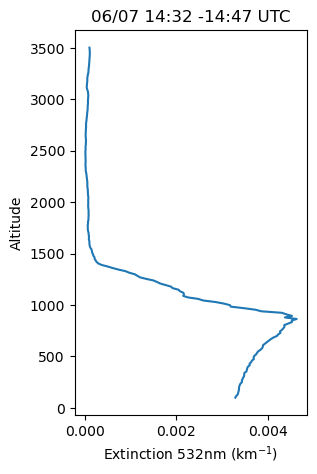

In [ ]:
fig, ax = plt.subplots(figsize=(3, 5))
ax.plot(subset_7_median_df['Median'], subset_df['Altitude'])
#ax.set_xscale('log')
#ax.set_xlim(-0,0.006)
ax.set_ylabel('Altitude')
ax.set_xlabel('Extinction 532nm (km$^{-1}$)')
ax.set_title('06/07 14:32 -14:47 UTC')

Text(0.5, 1.0, '06/07 14:29 -14:45 UTC')

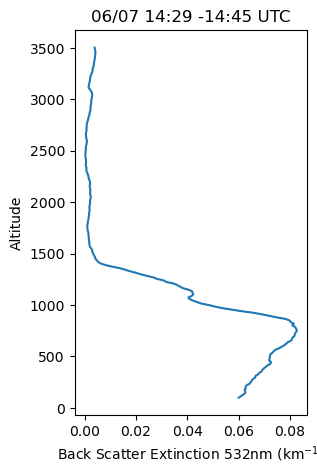

In [ ]:
fig, ax = plt.subplots(figsize=(3, 5))
ax.plot(subset_77_median_df['Median'], subset_df['Altitude'])
#ax.set_xscale('log')
#ax.set_xlim(-0,0.006)
ax.set_ylabel('Altitude')
ax.set_xlabel('Back Scatter Extinction 532nm (km$^{-1}$)')
ax.set_title('06/07 14:29 -14:45 UTC')

In [ ]:
"C:\Users\taiwoajayi\Documents\Dropsonds\ACTIVATE-Dropsonde_KingAir_202206071437_R1.ict"
"C:\Users\taiwoajayi\Documents\Dropsonds\ACTIVATE-Dropsonde_KingAir_202206071910_R1.ict"

In [161]:
DAY77b = simple_read('C:/Users/taiwoajayi/Documents/Dropsonds/ACTIVATE-Dropsonde_KingAir_202206071910_R1.ict')
DAY77b = DAY77b.dropna()
DAY77b['Temp'] = DAY77b['Temperature']+273
DAY77b

,Time_Start,TimeFLStart,Pressure,Temperature,RH,Speed,Direction,Latitude,Longitude,Altitude,GPS Altitude,Dewpoint,Uwnd,Vwnd,Wwnd,Temp
60,2022-06-07 19:10:50.000,2022-06-07 00:00:15.000,423.02,-17.29,30.63,16.51,285.16,32.295551,-65.212799,7134.3,7156.3,-30.83,15.93,-4.32,-1.13,255.71
62,2022-06-07 19:10:50.500,2022-06-07 00:00:15.500,423.44,-17.22,31.42,16.45,285.43,32.295532,-65.212715,7126.8,7148.0,-30.50,15.85,-4.38,-0.93,255.78
64,2022-06-07 19:10:51.000,2022-06-07 00:00:16.000,423.88,-17.16,32.63,16.38,285.69,32.295513,-65.212624,7119.2,7139.8,-30.03,15.77,-4.43,-0.75,255.84
66,2022-06-07 19:10:51.500,2022-06-07 00:00:16.500,424.32,-17.11,33.99,16.32,285.91,32.295490,-65.212540,7111.4,7131.7,-29.53,15.70,-4.47,-0.63,255.89
68,2022-06-07 19:10:52.000,2022-06-07 00:00:17.000,424.76,-17.05,35.01,16.27,286.09,32.295471,-65.212456,7103.5,7123.9,-29.15,15.63,-4.51,-0.58,255.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2270,2022-06-07 19:20:02.500,2022-06-07 00:09:27.500,1016.34,22.09,61.86,4.56,59.89,32.281616,-65.190475,32.7,39.7,14.56,-3.95,-2.29,-0.34,295.09
2272,2022-06-07 19:20:03.000,2022-06-07 00:09:28.000,1016.98,22.16,61.96,4.40,60.49,32.281605,-65.190498,27.2,33.9,14.65,-3.83,-2.17,-0.49,295.16
2274,2022-06-07 19:20:03.500,2022-06-07 00:09:28.500,1017.64,22.23,62.36,4.26,60.92,32.281597,-65.190521,21.6,28.3,14.82,-3.72,-2.07,-0.78,295.23
2276,2022-06-07 19:20:04.000,2022-06-07 00:09:29.000,1018.34,22.33,63.50,4.16,60.94,32.281586,-65.190544,15.6,22.7,15.19,-3.64,-2.02,-1.08,295.33


In [168]:
nbins = 20
bins_1000 = np.linspace(DAY77b.Altitude.min(), DAY77b.Altitude.max(), nbins+1)
DAY77b['Bins'] = pd.cut(DAY77b['Altitude'], bins_1000)
DAY77_subset_1000b = DAY77b.groupby('Bins').median()
DAY77_subset_1000b
DAY77_subset_25b = DAY77_subset_1000b - DAY77b.groupby('Bins').quantile(.25)
DAY77_subset_25b
DAY77_subset_75b = DAY77b.groupby('Bins').quantile(.75) - DAY77_subset_1000b
DAY77_subset_75b

,Time_Start,TimeFLStart,Pressure,Temperature,RH,Speed,Direction,Latitude,Longitude,Altitude,GPS Altitude,Dewpoint,Uwnd,Vwnd,Wwnd,Temp
Bins,,,,,,,,,,,,,,,,
"(9.5, 365.74]",0 days 00:00:08,0 days 00:00:08,9.9400,0.8000,2.4200,0.2200,2.6700,0.000221,0.000405,84.500,84.900,0.1100,0.2800,0.2800,0.2700,0.8000
"(365.74, 721.98]",0 days 00:00:07.750000128,0 days 00:00:07.750000128,9.9250,0.8450,2.9350,0.3500,6.1200,0.000105,0.000298,85.550,85.650,0.3300,0.0600,0.3800,0.1600,0.8450
"(721.98, 1078.22]",0 days 00:00:07.749999872,0 days 00:00:07.749999872,9.4400,0.7800,2.1450,0.1400,6.6350,0.000040,0.000268,92.050,92.600,0.0450,1.7350,0.3250,0.1300,0.7800
"(1078.22, 1434.46]",0 days 00:00:07.624999936,0 days 00:00:07.624999936,9.1725,0.8300,38.4625,0.5825,272.8950,0.000254,0.000036,88.400,88.375,10.8525,1.8775,1.6700,0.1300,0.8300
"(1434.46, 1790.7]",0 days 00:00:07.124999936,0 days 00:00:07.124999936,8.4600,0.0350,0.8450,0.2025,27.1475,0.000141,0.000045,85.700,85.150,1.9925,1.2675,0.4250,0.0825,0.0350
"(1790.7, 2146.94]",0 days 00:00:08.125000192,0 days 00:00:08.125000192,9.3875,0.4175,2.1100,0.2200,27.3650,0.000313,0.000061,95.075,95.450,1.0675,0.9325,0.6900,0.0800,0.4175
"(2146.94, 2503.18]",0 days 00:00:07.125000192,0 days 00:00:07.125000192,8.0025,0.3775,1.2075,0.1500,7.8150,0.000201,0.000254,91.525,91.900,0.8400,0.4150,0.2950,0.1150,0.3775
"(2503.18, 2859.42]",0 days 00:00:07,0 days 00:00:07,7.6600,0.3900,1.3500,0.9200,10.0900,0.000267,0.000290,97.800,98.100,0.1900,0.9700,0.2700,0.0700,0.3900
"(2859.42, 3215.66]",0 days 00:00:07,0 days 00:00:07,7.5100,0.4000,3.2900,0.9400,5.3800,0.000344,0.000275,99.900,100.100,2.1100,1.0000,0.5200,0.1000,0.4000


Text(0.02, 0.98, '06/07_14:38 - 14:47 UTC')

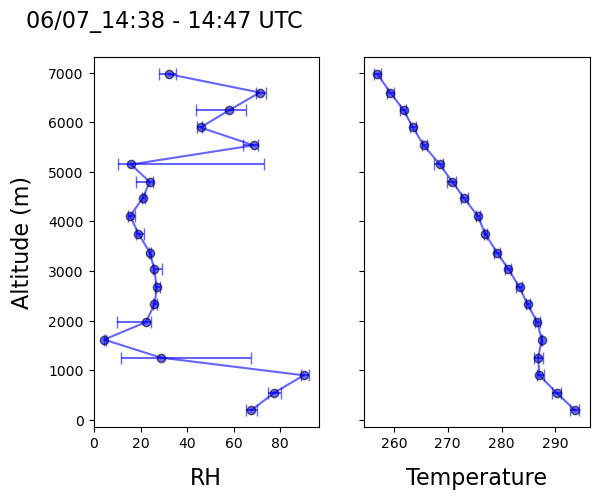

In [144]:
fig, ax = plt.subplots(1, 2, sharey='all')
ax[0].errorbar(DAY77_subset_1000b['RH'], DAY77_subset_1000b['Altitude'], xerr=[DAY77_subset_25b['RH'], DAY77_subset_75b['RH']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="blue", label = '>10nm')
ax[1].errorbar(DAY77_subset_1000b['Temp'], DAY77_subset_1000b['Altitude'], xerr=[DAY77_subset_25b['Temp'], DAY77_subset_75b['Temp']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="blue", label = '>10nm')
ax[0].set_ylabel('Altitude (m)', fontsize = 16, labelpad=11)
ax[0].set_xlabel('RH', fontsize = 16, labelpad=11)
ax[1].set_xlabel('Temperature', fontsize = 16, labelpad=11)
fig.text(0.02, 0.98, '06/07_14:38 - 14:47 UTC', ha='left', va='top', fontsize=16)

In [145]:
DAY77 = simple_read('C:/Users/taiwoajayi/Documents/Dropsonds/ACTIVATE-Dropsonde_KingAir_202206071437_R1.ict')
DAY77 = DAY77.dropna()
DAY77['Temp'] = DAY77['Temperature']+273
DAY77

,Time_Start,TimeFLStart,Pressure,Temperature,RH,Speed,Direction,Latitude,Longitude,Altitude,GPS Altitude,Dewpoint,Uwnd,Vwnd,Wwnd,Temp
60,2022-06-07 14:38:11.000,2022-06-07 00:00:15.000,405.64,-18.20,14.41,15.07,275.49,32.302452,-65.272614,7448.4,7488.5,-39.50,15.00,-1.44,-0.80,254.80
62,2022-06-07 14:38:11.500,2022-06-07 00:00:15.500,406.07,-18.13,14.13,15.04,275.38,32.302444,-65.272530,7440.6,7479.8,-39.64,14.97,-1.41,-0.75,254.87
64,2022-06-07 14:38:12.000,2022-06-07 00:00:16.000,406.50,-18.07,13.76,15.01,275.29,32.302441,-65.272446,7432.6,7471.2,-39.86,14.94,-1.38,-0.70,254.93
66,2022-06-07 14:38:12.500,2022-06-07 00:00:16.500,406.93,-18.01,13.28,14.97,275.23,32.302433,-65.272369,7424.7,7462.7,-40.16,14.90,-1.36,-0.68,254.99
68,2022-06-07 14:38:13.000,2022-06-07 00:00:17.000,407.37,-17.95,12.76,14.92,275.21,32.302425,-65.272285,7416.6,7454.1,-40.51,14.86,-1.35,-0.71,255.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2370,2022-06-07 14:47:48.500,2022-06-07 00:09:52.500,1016.27,22.24,65.06,6.12,26.20,32.289631,-65.243660,33.3,41.7,15.47,-2.70,-5.49,0.07,295.24
2372,2022-06-07 14:47:49.000,2022-06-07 00:09:53.000,1016.89,22.30,65.46,6.11,25.89,32.289604,-65.243675,27.9,36.5,15.63,-2.67,-5.50,0.06,295.30
2374,2022-06-07 14:47:49.500,2022-06-07 00:09:53.500,1017.51,22.37,65.50,6.09,26.02,32.289581,-65.243690,22.7,31.1,15.70,-2.67,-5.47,-0.00,295.37
2376,2022-06-07 14:47:50.000,2022-06-07 00:09:54.000,1018.13,22.43,64.90,6.07,26.44,32.289555,-65.243706,17.4,25.9,15.62,-2.70,-5.43,-0.11,295.43


In [146]:
#binning data into groups
nbins = 20
bins_1000 = np.linspace(DAY77.Altitude.min(), DAY77.Altitude.max(), nbins+1)
DAY77['Bins'] = pd.cut(DAY77['Altitude'], bins_1000)
DAY77_subset_1000 = DAY77.groupby('Bins').median()
DAY77_subset_1000

,Time_Start,TimeFLStart,Pressure,Temperature,RH,Speed,Direction,Latitude,Longitude,Altitude,GPS Altitude,Dewpoint,Uwnd,Vwnd,Wwnd,Temp
Bins,,,,,,,,,,,,,,,,
"(11.8, 383.63]",2022-06-07 14:47:33.249999872,2022-06-07 00:09:37.249999872,997.010,20.620,69.740,6.315,29.535,32.290397,-65.243171,199.30,208.55,14.985,-3.080,-5.500,0.155,293.620
"(383.63, 755.46]",2022-06-07 14:46:58.249999872,2022-06-07 00:09:02.249999872,954.610,17.010,84.970,6.485,36.275,32.292054,-65.241833,573.20,583.65,14.495,-3.910,-5.205,0.585,290.010
"(755.46, 1127.29]",2022-06-07 14:46:25.000000000,2022-06-07 00:08:29.000000000,914.300,13.900,87.060,6.560,31.790,32.293640,-65.240509,939.90,951.00,11.810,-3.300,-5.660,0.080,286.900
"(1127.29, 1499.12]",2022-06-07 14:45:54.249999872,2022-06-07 00:07:58.249999872,877.435,13.470,63.845,6.840,352.050,32.295578,-65.240238,1287.05,1299.40,6.925,0.770,-6.785,0.030,286.470
"(1499.12, 1870.95]",2022-06-07 14:45:19.249999872,2022-06-07 00:07:23.249999872,836.660,13.280,8.315,4.170,323.875,32.296962,-65.240978,1687.30,1699.45,-20.070,2.185,-3.380,-0.015,286.280
"(1870.95, 2242.78]",2022-06-07 14:44:47.750000128,2022-06-07 00:06:51.750000128,800.675,12.935,6.825,5.470,331.050,32.298114,-65.241501,2055.85,2069.05,-22.595,2.425,-4.420,0.000,285.935
"(2242.78, 2614.61]",2022-06-07 14:44:15.750000128,2022-06-07 00:06:19.750000128,764.980,11.150,27.385,4.260,302.815,32.299030,-65.242660,2436.80,2450.55,-7.090,3.380,-2.160,0.045,284.150
"(2614.61, 2986.44]",2022-06-07 14:43:47.750000128,2022-06-07 00:05:51.750000128,734.575,9.285,28.905,6.800,288.110,32.299560,-65.244053,2773.80,2787.80,-7.700,6.390,-1.690,0.085,282.285
"(2986.44, 3358.27]",2022-06-07 14:43:16.000000000,2022-06-07 00:05:20.000000000,700.870,7.590,23.460,6.710,282.310,32.299881,-65.246353,3161.50,3176.50,-12.330,6.630,-1.500,0.090,280.590


In [147]:
DAY77_subset_25 = DAY77_subset_1000 - DAY77.groupby('Bins').quantile(.25)
DAY77_subset_25
DAY77_subset_75 = DAY77.groupby('Bins').quantile(.75) - DAY77_subset_1000
DAY77_subset_75

,Time_Start,TimeFLStart,Pressure,Temperature,RH,Speed,Direction,Latitude,Longitude,Altitude,GPS Altitude,Dewpoint,Uwnd,Vwnd,Wwnd,Temp
Bins,,,,,,,,,,,,,,,,
"(11.8, 383.63]",0 days 00:00:08.375000064,0 days 00:00:08.375000064,10.6100,0.8750,3.3900,0.2500,2.4275,0.000396,0.000286,90.550,90.950,0.1650,0.2325,0.1325,0.0950,0.8750
"(383.63, 755.46]",0 days 00:00:08.875000064,0 days 00:00:08.875000064,10.1150,0.8525,2.9175,0.2700,1.7375,0.000391,0.000337,88.175,88.100,0.0850,0.2425,0.1600,0.2175,0.8525
"(755.46, 1127.29]",0 days 00:00:07.750000128,0 days 00:00:07.750000128,9.3950,0.5600,3.2500,0.6700,2.2250,0.000494,0.000256,97.700,98.350,1.3000,0.9800,0.4600,0.1100,0.5600
"(1127.29, 1499.12]",0 days 00:00:06.875000064,0 days 00:00:06.875000064,8.1925,0.1300,12.7775,0.0725,2.9125,0.000399,0.000049,78.275,78.100,2.7275,0.5450,0.9250,0.0625,0.1300
"(1499.12, 1870.95]",0 days 00:00:07.625000192,0 days 00:00:07.625000192,8.8300,0.5675,2.1875,0.2000,12.0050,0.000250,0.000175,88.700,88.875,3.2625,0.3250,0.3250,0.1725,0.5675
"(1870.95, 2242.78]",0 days 00:00:08.124999936,0 days 00:00:08.124999936,9.1750,0.2500,6.7950,0.4750,13.7375,0.000310,0.000151,90.500,90.425,7.6600,0.8325,0.6800,0.0900,0.2500
"(2242.78, 2614.61]",0 days 00:00:07.124999936,0 days 00:00:07.124999936,7.8800,0.3975,2.0375,0.4900,4.0100,0.000166,0.000240,91.625,91.250,1.1575,0.7975,0.3175,0.0925,0.3975
"(2614.61, 2986.44]",0 days 00:00:06.374999808,0 days 00:00:06.374999808,6.8775,0.4450,0.2250,0.4625,3.9625,0.000107,0.000407,121.050,121.650,0.1200,0.8125,0.7300,0.1150,0.4450
"(2986.44, 3358.27]",0 days 00:00:07,0 days 00:00:07,7.4000,0.2000,5.5000,0.2500,6.0700,0.000156,0.000450,99.800,99.500,3.1400,0.1800,0.6600,0.0200,0.2000


Text(0.02, 0.98, '06/07_14:38 - 14:47 UTC')

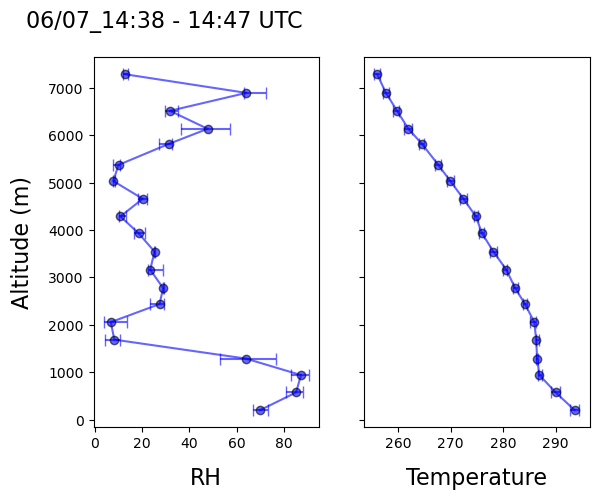

In [148]:
fig, ax = plt.subplots(1, 2, sharey='all')
ax[0].errorbar(DAY77_subset_1000['RH'], DAY77_subset_1000['Altitude'], xerr=[DAY77_subset_25['RH'], DAY77_subset_75['RH']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="blue", label = '>10nm')
ax[1].errorbar(DAY77_subset_1000['Temp'], DAY77_subset_1000['Altitude'], xerr=[DAY77_subset_25['Temp'], DAY77_subset_75['Temp']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="blue", label = '>10nm')
ax[0].set_ylabel('Altitude (m)', fontsize = 16, labelpad=11)
ax[0].set_xlabel('RH', fontsize = 16, labelpad=11)
ax[1].set_xlabel('Temperature', fontsize = 16, labelpad=11)
fig.text(0.02, 0.98, '06/07_14:38 - 14:47 UTC', ha='left', va='top', fontsize=16)

In [ ]:
DAY88 = simple_read('C:/Users/taiwoajayi/Documents/Dropsonds/ACTIVATE-Dropsonde_KingAir_202206082033_R1.ict')
DAY88 = DAY88.dropna()
DAY88['Temp'] = DAY88['Temperature']+273
DAY88


,Time_Start,TimeFLStart,Pressure,Temperature,RH,Speed,Direction,Latitude,Longitude,Altitude,GPS Altitude,Dewpoint,Uwnd,Vwnd,Wwnd,Temp
60,2022-06-08 20:33:16.000,2022-06-08 00:00:15.000,341.04,-27.86,12.42,11.21,293.27,32.253956,-65.263222,8731.5,8760.4,-49.03,10.30,-4.43,1.22,245.14
62,2022-06-08 20:33:16.500,2022-06-08 00:00:15.500,341.41,-27.80,12.30,11.25,293.76,32.253933,-65.263161,8723.8,8752.4,-49.07,10.29,-4.53,1.22,245.20
64,2022-06-08 20:33:17.000,2022-06-08 00:00:16.000,341.78,-27.74,12.11,11.29,294.22,32.253910,-65.263100,8716.1,8744.4,-49.16,10.29,-4.63,1.19,245.26
66,2022-06-08 20:33:17.500,2022-06-08 00:00:16.500,342.15,-27.67,11.86,11.33,294.59,32.253887,-65.263039,8708.3,8736.4,-49.29,10.30,-4.72,1.15,245.33
68,2022-06-08 20:33:18.000,2022-06-08 00:00:17.000,342.52,-27.60,11.65,11.37,294.84,32.253868,-65.262978,8700.4,8728.6,-49.40,10.32,-4.78,1.11,245.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2786,2022-06-08 20:44:37.500,2022-06-08 00:11:36.500,1015.42,22.37,64.83,7.79,142.61,32.251766,-65.243233,38.0,41.4,15.54,-4.73,6.19,0.12,295.37
2788,2022-06-08 20:44:38.000,2022-06-08 00:11:37.000,1016.05,22.42,64.68,7.74,142.17,32.251797,-65.243256,32.6,36.0,15.56,-4.75,6.11,-0.13,295.42
2790,2022-06-08 20:44:38.500,2022-06-08 00:11:37.500,1016.71,22.48,64.34,7.63,141.32,32.251823,-65.243279,26.9,30.7,15.53,-4.77,5.96,-0.41,295.48
2792,2022-06-08 20:44:39.000,2022-06-08 00:11:38.000,1017.39,22.53,63.94,7.49,139.96,32.251850,-65.243301,21.1,25.4,15.48,-4.82,5.73,-0.66,295.53


In [ ]:
nbins = 20
bins_1000 = np.linspace(DAY88.Altitude.min(), DAY88.Altitude.max(), nbins+1)
DAY88['Bins'] = pd.cut(DAY88['Altitude'], bins_1000)
DAY88_subset_1000 = DAY88.groupby('Bins').median()
DAY88_subset_1000
DAY88_subset_25 = DAY88_subset_1000b - DAY88.groupby('Bins').quantile(.25)
DAY88_subset_25
DAY88_subset_75 = DAY88.groupby('Bins').quantile(.75) - DAY88_subset_1000
DAY88_subset_75

,Time_Start,TimeFLStart,Pressure,Temperature,RH,Speed,Direction,Latitude,Longitude,Altitude,GPS Altitude,Dewpoint,Uwnd,Vwnd,Wwnd,Temp
Bins,,,,,,,,,,,,,,,,
"(15.3, 451.11]",0 days 00:00:10.124999936,0 days 00:00:10.124999936,12.3475,1.0525,3.8775,0.0800,1.9875,0.000548,0.000471,107.675,108.700,0.1600,0.1900,0.2900,0.1225,1.0525
"(451.11, 886.92]",0 days 00:00:09.875000064,0 days 00:00:09.875000064,11.1525,0.9725,4.4675,0.2475,1.2700,0.000526,0.000490,106.600,107.725,0.1625,0.0675,0.2725,0.4300,0.9725
"(886.92, 1322.73]",0 days 00:00:09.249999872,0 days 00:00:09.249999872,10.9650,1.1750,4.0100,0.1850,14.6650,0.000462,0.000362,119.300,120.250,0.2900,2.0300,0.0600,0.0900,1.1750
"(1322.73, 1758.54]",0 days 00:00:09.374999808,0 days 00:00:09.374999808,10.6600,0.7725,12.0525,0.6850,1.2800,0.000346,0.000023,106.725,105.925,7.6950,0.1525,0.7175,0.0825,0.7725
"(1758.54, 2194.35]",0 days 00:00:09.250000128,0 days 00:00:09.250000128,10.2150,0.4500,1.3400,0.1250,7.2000,0.000145,0.000118,112.850,113.550,0.6050,0.1050,0.2200,0.1050,0.4500
"(2194.35, 2630.16]",0 days 00:00:08.375000064,0 days 00:00:08.375000064,9.2425,0.1850,2.3200,0.7400,20.0175,0.000078,0.000024,113.000,113.175,1.6200,0.6900,0.5400,0.1100,0.1850
"(2630.16, 3065.97]",0 days 00:00:08.125000192,0 days 00:00:08.125000192,8.6600,0.8400,4.8400,0.5500,7.1425,0.000090,0.000173,92.375,92.425,1.9575,0.5950,0.2450,0.0475,0.8400
"(3065.97, 3501.78]",0 days 00:00:07,0 days 00:00:07,7.3100,0.6700,6.8700,0.1200,1.3800,0.000084,0.000198,98.500,99.200,1.0600,0.1000,0.2300,0.1100,0.6700
"(3501.78, 3937.59]",0 days 00:00:08.250000128,0 days 00:00:08.250000128,8.2900,0.2550,18.8050,0.1700,1.1600,0.000111,0.000253,127.250,127.850,4.8900,0.2100,0.5750,0.1950,0.2550


In [163]:
DAY10 = simple_read('C:/Users/taiwoajayi/Documents/Dropsonds/ACTIVATE-Dropsonde_KingAir_202206101516_R1.ict')
DAY10 = DAY88.dropna()
DAY10['Temp'] = DAY10['Temperature']+273
DAY10

,Time_Start,TimeFLStart,Pressure,Temperature,RH,Speed,Direction,Latitude,Longitude,Altitude,GPS Altitude,Dewpoint,Uwnd,Vwnd,Wwnd,Temp
60,2022-06-08 20:33:16.000,2022-06-08 00:00:15.000,341.04,-27.86,12.42,11.21,293.27,32.253956,-65.263222,8731.5,8760.4,-49.03,10.30,-4.43,1.22,245.14
62,2022-06-08 20:33:16.500,2022-06-08 00:00:15.500,341.41,-27.80,12.30,11.25,293.76,32.253933,-65.263161,8723.8,8752.4,-49.07,10.29,-4.53,1.22,245.20
64,2022-06-08 20:33:17.000,2022-06-08 00:00:16.000,341.78,-27.74,12.11,11.29,294.22,32.253910,-65.263100,8716.1,8744.4,-49.16,10.29,-4.63,1.19,245.26
66,2022-06-08 20:33:17.500,2022-06-08 00:00:16.500,342.15,-27.67,11.86,11.33,294.59,32.253887,-65.263039,8708.3,8736.4,-49.29,10.30,-4.72,1.15,245.33
68,2022-06-08 20:33:18.000,2022-06-08 00:00:17.000,342.52,-27.60,11.65,11.37,294.84,32.253868,-65.262978,8700.4,8728.6,-49.40,10.32,-4.78,1.11,245.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2786,2022-06-08 20:44:37.500,2022-06-08 00:11:36.500,1015.42,22.37,64.83,7.79,142.61,32.251766,-65.243233,38.0,41.4,15.54,-4.73,6.19,0.12,295.37
2788,2022-06-08 20:44:38.000,2022-06-08 00:11:37.000,1016.05,22.42,64.68,7.74,142.17,32.251797,-65.243256,32.6,36.0,15.56,-4.75,6.11,-0.13,295.42
2790,2022-06-08 20:44:38.500,2022-06-08 00:11:37.500,1016.71,22.48,64.34,7.63,141.32,32.251823,-65.243279,26.9,30.7,15.53,-4.77,5.96,-0.41,295.48
2792,2022-06-08 20:44:39.000,2022-06-08 00:11:38.000,1017.39,22.53,63.94,7.49,139.96,32.251850,-65.243301,21.1,25.4,15.48,-4.82,5.73,-0.66,295.53


In [164]:
nbins = 20
bins_1000 = np.linspace(DAY10.Altitude.min(), DAY10.Altitude.max(), nbins+1)
DAY10['Bins'] = pd.cut(DAY10['Altitude'], bins_1000)
DAY10_subset_1000 = DAY10.groupby('Bins').median()
DAY10_subset_1000
DAY10_subset_25 = DAY10_subset_1000 - DAY10.groupby('Bins').quantile(.25)
DAY10_subset_25
DAY10_subset_75 = DAY10.groupby('Bins').quantile(.75) - DAY10_subset_1000
DAY10_subset_75

,Time_Start,TimeFLStart,Pressure,Temperature,RH,Speed,Direction,Latitude,Longitude,Altitude,GPS Altitude,Dewpoint,Uwnd,Vwnd,Wwnd,Temp
Bins,,,,,,,,,,,,,,,,
"(15.3, 451.11]",0 days 00:00:10.124999936,0 days 00:00:10.124999936,12.3475,1.0525,3.8775,0.0800,1.9875,0.000548,0.000471,107.675,108.700,0.1600,0.1900,0.2900,0.1225,1.0525
"(451.11, 886.92]",0 days 00:00:09.875000064,0 days 00:00:09.875000064,11.1525,0.9725,4.4675,0.2475,1.2700,0.000526,0.000490,106.600,107.725,0.1625,0.0675,0.2725,0.4300,0.9725
"(886.92, 1322.73]",0 days 00:00:09.249999872,0 days 00:00:09.249999872,10.9650,1.1750,4.0100,0.1850,14.6650,0.000462,0.000362,119.300,120.250,0.2900,2.0300,0.0600,0.0900,1.1750
"(1322.73, 1758.54]",0 days 00:00:09.374999808,0 days 00:00:09.374999808,10.6600,0.7725,12.0525,0.6850,1.2800,0.000346,0.000023,106.725,105.925,7.6950,0.1525,0.7175,0.0825,0.7725
"(1758.54, 2194.35]",0 days 00:00:09.250000128,0 days 00:00:09.250000128,10.2150,0.4500,1.3400,0.1250,7.2000,0.000145,0.000118,112.850,113.550,0.6050,0.1050,0.2200,0.1050,0.4500
"(2194.35, 2630.16]",0 days 00:00:08.375000064,0 days 00:00:08.375000064,9.2425,0.1850,2.3200,0.7400,20.0175,0.000078,0.000024,113.000,113.175,1.6200,0.6900,0.5400,0.1100,0.1850
"(2630.16, 3065.97]",0 days 00:00:08.125000192,0 days 00:00:08.125000192,8.6600,0.8400,4.8400,0.5500,7.1425,0.000090,0.000173,92.375,92.425,1.9575,0.5950,0.2450,0.0475,0.8400
"(3065.97, 3501.78]",0 days 00:00:07,0 days 00:00:07,7.3100,0.6700,6.8700,0.1200,1.3800,0.000084,0.000198,98.500,99.200,1.0600,0.1000,0.2300,0.1100,0.6700
"(3501.78, 3937.59]",0 days 00:00:08.250000128,0 days 00:00:08.250000128,8.2900,0.2550,18.8050,0.1700,1.1600,0.000111,0.000253,127.250,127.850,4.8900,0.2100,0.5750,0.1950,0.2550


In [150]:
DAY10b = simple_read('C:/Users/taiwoajayi/Documents/Dropsonds/ACTIVATE-Dropsonde_KingAir_202206101932_R1.ict')
DAY10b = DAY10b.dropna()
DAY10b['Temp'] = DAY10b['Temperature']+273
DAY10b
nbins = 20
bins_1000 = np.linspace(DAY10b.Altitude.min(), DAY10b.Altitude.max(), nbins+1)
DAY10b['Bins'] = pd.cut(DAY10b['Altitude'], bins_1000)
DAY10_subset_1000b = DAY10b.groupby('Bins').median()
DAY10_subset_1000b
DAY10_subset_25b = DAY10_subset_1000b - DAY10b.groupby('Bins').quantile(.25)
DAY10_subset_25b
DAY10_subset_75b = DAY10b.groupby('Bins').quantile(.75) - DAY10_subset_1000b
DAY10_subset_75b

,Time_Start,TimeFLStart,Pressure,Temperature,RH,Speed,Direction,Latitude,Longitude,Altitude,GPS Altitude,Dewpoint,Uwnd,Vwnd,Wwnd,Temp
Bins,,,,,,,,,,,,,,,,
"(6.3, 442.34]",0 days 00:00:09.624999936,0 days 00:00:09.624999936,12.3275,0.5450,2.5950,0.4300,9.3275,0.000327,0.000475,104.000,103.975,0.9975,0.9375,0.4700,0.1425,0.5450
"(442.34, 878.38]",0 days 00:00:08.749999872,0 days 00:00:08.749999872,11.0700,0.5600,0.5050,0.1850,3.6250,0.000267,0.000481,113.300,113.500,0.5950,0.4500,0.0400,0.0900,0.5600
"(878.38, 1314.42]",0 days 00:00:08.749999872,0 days 00:00:08.749999872,10.9750,0.6150,1.0400,0.0650,1.3900,0.000245,0.000469,112.100,112.650,0.7950,0.0900,0.1450,0.1100,0.6150
"(1314.42, 1750.46]",0 days 00:00:09,0 days 00:00:09,11.0900,0.7500,4.8600,0.1600,2.3600,0.000320,0.000519,93.700,93.600,0.3800,0.3100,0.0900,0.1500,0.7500
"(1750.46, 2186.5]",0 days 00:00:07.124999936,0 days 00:00:07.124999936,8.6400,0.3750,2.5550,0.4700,8.9200,0.000255,0.000348,141.900,143.225,0.9100,0.1300,0.4000,0.1275,0.3750
"(2186.5, 2622.54]",0 days 00:00:10,0 days 00:00:10,12.0100,0.6400,1.2800,0.2750,1.1300,0.000265,0.000568,111.700,111.650,1.3300,0.3050,0.1200,0.1100,0.6400
"(2622.54, 3058.58]",0 days 00:00:05.874999808,0 days 00:00:05.874999808,6.8350,0.3125,3.3050,0.1825,1.1900,0.000128,0.000282,92.825,93.850,1.0075,0.2025,0.3250,0.2000,0.3125
"(3058.58, 3494.62]",0 days 00:00:06.250000128,0 days 00:00:06.250000128,7.2100,0.1450,7.3250,0.7600,7.0350,0.000049,0.000203,124.850,125.050,2.7250,0.6350,0.0750,0.0850,0.1450
"(3494.62, 3930.66]",0 days 00:00:05.500000,0 days 00:00:05.500000,6.2750,0.6450,2.4450,0.3050,3.3150,0.000064,0.000343,166.150,166.850,0.4150,0.3200,0.2150,0.1050,0.6450


In [151]:
DAY10c = simple_read('C:/Users/taiwoajayi/Documents/Dropsonds/ACTIVATE-Dropsonde_KingAir_202206101937_R1.ict')
DAY10c = DAY10c.dropna()
DAY10c['Temp'] = DAY10c['Temperature']+273
DAY10c
nbins = 20
bins_1000 = np.linspace(DAY10c.Altitude.min(), DAY10c.Altitude.max(), nbins+1)
DAY10c['Bins'] = pd.cut(DAY10c['Altitude'], bins_1000)
DAY10_subset_1000c = DAY10c.groupby('Bins').median()
DAY10_subset_1000c
DAY10_subset_25c = DAY10_subset_1000c - DAY10c.groupby('Bins').quantile(.25)
DAY10_subset_25c
DAY10_subset_75c = DAY10c.groupby('Bins').quantile(.75) - DAY10_subset_1000c
DAY10_subset_75c


,Time_Start,TimeFLStart,Pressure,Temperature,RH,Speed,Direction,Latitude,Longitude,Altitude,GPS Altitude,Dewpoint,Uwnd,Vwnd,Wwnd,Temp
Bins,,,,,,,,,,,,,,,,
"(23.3, 459.015]",0 days 00:00:10.375000064,0 days 00:00:10.375000064,13.2500,0.4450,3.4425,0.4550,3.8400,0.000388,0.000521,105.500,105.875,1.6600,0.7150,0.2925,0.1600,0.4450
"(459.015, 894.73]",0 days 00:00:09.500000,0 days 00:00:09.500000,11.9700,0.8200,0.8200,0.0400,1.6700,0.000235,0.000618,98.700,99.000,0.7000,0.0500,0.2100,0.0900,0.8200
"(894.73, 1330.445]",0 days 00:00:08.750000128,0 days 00:00:08.750000128,10.8550,0.8000,0.4350,0.3100,0.3900,0.000177,0.000527,75.000,75.300,0.5300,0.2800,0.0800,0.1300,0.8000
"(1330.445, 1766.16]",0 days 00:00:05.500000,0 days 00:00:05.500000,6.8300,0.4000,1.0400,0.0700,0.4900,0.000160,0.000358,80.800,80.800,0.2900,0.0900,0.0600,0.0500,0.4000
"(1766.16, 2201.875]",0 days 00:00:09.250000128,0 days 00:00:09.250000128,11.0600,0.6650,2.5000,0.1850,1.5050,0.000296,0.000573,91.000,91.650,0.1000,0.2700,0.1600,0.1050,0.6650
"(2201.875, 2637.59]",0 days 00:00:05.624999936,0 days 00:00:05.624999936,6.6400,0.7100,3.3000,0.1425,1.8325,0.000101,0.000286,103.850,104.375,0.3075,0.1300,0.5750,0.2200,0.7100
"(2637.59, 3073.305]",0 days 00:00:09.500000,0 days 00:00:09.500000,10.4900,0.1200,12.9000,0.2800,2.1400,0.000318,0.000420,104.800,104.500,2.1800,0.1300,0.5900,0.1600,0.1200
"(3073.305, 3509.02]",0 days 00:00:07.374999808,0 days 00:00:07.374999808,7.9100,0.3100,7.4825,0.9100,2.7225,0.000078,0.000217,88.725,89.125,2.1575,0.8800,0.4875,0.0675,0.3100
"(3509.02, 3944.735]",0 days 00:00:07.874999808,0 days 00:00:07.874999808,7.9625,0.6475,1.9825,0.1725,2.2300,0.000191,0.000423,107.600,107.850,0.4900,0.2100,0.2925,0.0925,0.6475


In [152]:
DAY10d = simple_read('C:/Users/taiwoajayi/Documents/Dropsonds/ACTIVATE-Dropsonde_KingAir_202206101945_R1.ict')
DAY10d = DAY10d.dropna()
DAY10d['Temp'] = DAY10d['Temperature']+273
DAY10d
nbins = 20
bins_1000 = np.linspace(DAY10d.Altitude.min(), DAY10d.Altitude.max(), nbins+1)
DAY10d['Bins'] = pd.cut(DAY10d['Altitude'], bins_1000)
DAY10_subset_1000d = DAY10d.groupby('Bins').median()
DAY10_subset_1000d
DAY10_subset_25d = DAY10_subset_1000d - DAY10d.groupby('Bins').quantile(.25)
DAY10_subset_25d
DAY10_subset_75d = DAY10d.groupby('Bins').quantile(.75) - DAY10_subset_1000d
DAY10_subset_75d

,Time_Start,TimeFLStart,Pressure,Temperature,RH,Speed,Direction,Latitude,Longitude,Altitude,GPS Altitude,Dewpoint,Uwnd,Vwnd,Wwnd,Temp
Bins,,,,,,,,,,,,,,,,
"(11.1, 446.975]",0 days 00:00:08.874999808,0 days 00:00:08.874999808,11.1900,0.7825,1.7800,0.3550,9.8700,0.000456,0.000456,101.400,101.325,0.3375,0.6950,0.3325,0.0850,0.7825
"(446.975, 882.85]",0 days 00:00:08.375000064,0 days 00:00:08.375000064,10.6550,0.5975,0.2650,0.0900,3.2850,0.000282,0.000481,109.975,110.075,0.8850,0.2450,0.1900,0.0825,0.5975
"(882.85, 1318.725]",0 days 00:00:09,0 days 00:00:09,11.1200,0.5700,1.3500,0.2000,1.2500,0.000211,0.000686,107.200,107.400,1.1600,0.2400,0.4100,0.0900,0.5700
"(1318.725, 1754.6]",0 days 00:00:08.500000,0 days 00:00:08.500000,10.2600,0.8200,2.2800,0.1500,1.0400,0.000181,0.000679,108.100,108.400,0.2400,0.1400,0.1100,0.1000,0.8200
"(1754.6, 2190.475]",0 days 00:00:08.500000,0 days 00:00:08.500000,10.0900,0.4000,4.7400,0.1700,1.0100,0.000214,0.000686,106.400,106.400,0.8800,0.2100,0.6600,0.1000,0.4000
"(2190.475, 2626.35]",0 days 00:00:07.875000064,0 days 00:00:07.875000064,9.2800,0.2150,8.3650,0.5500,0.7700,0.000264,0.000488,100.325,101.050,2.1325,0.5500,0.1425,0.1400,0.2150
"(2626.35, 3062.225]",0 days 00:00:07.250000128,0 days 00:00:07.250000128,8.3150,0.4700,2.6850,0.1150,6.7600,0.000281,0.000381,122.250,122.350,0.2650,0.2950,0.4950,0.0850,0.4700
"(3062.225, 3498.1]",0 days 00:00:06.374999808,0 days 00:00:06.374999808,7.2275,0.1775,2.2700,0.4925,3.8625,0.000129,0.000139,99.525,100.050,0.9550,0.1800,0.6100,0.1350,0.1775
"(3498.1, 3933.975]",0 days 00:00:06.250000128,0 days 00:00:06.250000128,6.8450,0.7150,1.4050,0.1600,6.0400,0.000174,0.000301,85.000,85.600,0.2600,0.1100,0.3250,0.1000,0.7150


In [153]:
DAY10e = simple_read('C:/Users/taiwoajayi/Documents/Dropsonds/ACTIVATE-Dropsonde_KingAir_202206101948_R1.ict')
DAY10e = DAY10e.dropna()
DAY10e['Temp'] = DAY10e['Temperature']+273
DAY10e
nbins = 20
bins_1000 = np.linspace(DAY10e.Altitude.min(), DAY10e.Altitude.max(), nbins+1)
DAY10e['Bins'] = pd.cut(DAY10e['Altitude'], bins_1000)
DAY10_subset_1000e = DAY10e.groupby('Bins').median()
DAY10_subset_1000e
DAY10_subset_25e = DAY10_subset_1000e - DAY10e.groupby('Bins').quantile(.25)
DAY10_subset_25e
DAY10_subset_75e = DAY10e.groupby('Bins').quantile(.75) - DAY10_subset_1000e
DAY10_subset_75e

,Time_Start,TimeFLStart,Pressure,Temperature,RH,Speed,Direction,Latitude,Longitude,Altitude,GPS Altitude,Dewpoint,Uwnd,Vwnd,Wwnd,Temp
Bins,,,,,,,,,,,,,,,,
"(8.3, 444.55]",0 days 00:00:09.500000,0 days 00:00:09.500000,12.1800,0.6100,1.8400,0.3000,9.4400,0.000361,0.000495,107.600,108.400,0.6300,0.3300,0.3000,0.0700,0.6100
"(444.55, 880.8]",0 days 00:00:09.125000192,0 days 00:00:09.125000192,11.4425,0.9075,0.7275,0.0550,3.4825,0.000224,0.000528,100.300,100.175,0.5925,0.1125,0.1650,0.0675,0.9075
"(880.8, 1317.05]",0 days 00:00:08.625000192,0 days 00:00:08.625000192,10.6025,0.5450,1.2050,0.0975,0.6975,0.000144,0.000581,101.975,102.000,0.7225,0.0675,0.0475,0.1025,0.5450
"(1317.05, 1753.3]",0 days 00:00:09,0 days 00:00:09,11.0600,0.7800,1.1900,0.1200,1.1700,0.000188,0.000702,103.500,104.100,0.6800,0.1200,0.4000,0.1300,0.7800
"(1753.3, 2189.55]",0 days 00:00:07.874999808,0 days 00:00:07.874999808,9.7900,0.2325,1.9100,0.8150,5.2375,0.000193,0.000505,107.375,107.100,0.3800,1.0875,0.2950,0.0725,0.2325
"(2189.55, 2625.8]",0 days 00:00:08.375000064,0 days 00:00:08.375000064,10.1750,0.2800,0.7875,0.1800,0.6450,0.000226,0.000520,111.000,111.425,0.5000,0.1400,0.0625,0.1150,0.2800
"(2625.8, 3062.05]",0 days 00:00:06.625000192,0 days 00:00:06.625000192,7.8150,0.3575,11.0075,0.4250,8.0775,0.000274,0.000339,102.775,103.325,1.0300,1.0650,0.3025,0.0675,0.3575
"(3062.05, 3498.3]",0 days 00:00:06.500000256,0 days 00:00:06.500000256,7.4400,0.3075,6.1525,0.2700,1.8625,0.000122,0.000217,63.675,64.225,0.6375,0.0775,0.7175,0.1525,0.3075
"(3498.3, 3934.55]",0 days 00:00:06.499999744,0 days 00:00:06.499999744,7.4575,0.8750,1.4350,0.2550,1.7450,0.000200,0.000338,91.500,91.525,0.6650,0.0900,0.5350,0.1150,0.8750


In [154]:
DAY11 = simple_read('C:/Users/taiwoajayi/Documents/Dropsonds/ACTIVATE-Dropsonde_KingAir_202206111517_R1.ict')
DAY11 = DAY11.dropna()
DAY11['Temp'] = DAY11['Temperature']+273
DAY11
nbins = 20
bins_1000 = np.linspace(DAY11.Altitude.min(), DAY11.Altitude.max(), nbins+1)
DAY11['Bins'] = pd.cut(DAY11['Altitude'], bins_1000)
DAY11_subset_1000 = DAY11.groupby('Bins').median()
DAY11_subset_1000
DAY11_subset_25 = DAY11_subset_1000 - DAY11.groupby('Bins').quantile(.25)
DAY11_subset_25
DAY11_subset_75 = DAY11.groupby('Bins').quantile(.75) - DAY11_subset_1000
DAY11_subset_75

,Time_Start,TimeFLStart,Pressure,Temperature,RH,Speed,Direction,Latitude,Longitude,Altitude,GPS Altitude,Dewpoint,Uwnd,Vwnd,Wwnd,Temp
Bins,,,,,,,,,,,,,,,,
"(6.3, 443.41]",0 days 00:00:09.500000,0 days 00:00:09.500000,12.0300,0.2500,4.8500,0.1200,4.1700,0.000672,0.000450,107.700,108.000,1.3900,0.3100,0.2500,0.1300,0.2500
"(443.41, 880.52]",0 days 00:00:09.375000064,0 days 00:00:09.375000064,11.7325,0.5025,3.1025,0.1100,0.4175,0.000608,0.000544,109.350,109.000,1.1475,0.0600,0.1150,0.1325,0.5025
"(880.52, 1317.63]",0 days 00:00:09.124999936,0 days 00:00:09.124999936,11.2475,0.6450,1.6800,0.1975,6.6925,0.000509,0.000608,108.225,109.050,0.3175,0.6650,0.8800,0.0700,0.6450
"(1317.63, 1754.74]",0 days 00:00:09,0 days 00:00:09,10.9100,0.6500,0.5700,0.5200,0.8400,0.000374,0.000709,108.800,108.700,0.2900,0.5300,0.1200,0.1200,0.6500
"(1754.74, 2191.85]",0 days 00:00:09,0 days 00:00:09,10.5000,0.3300,2.0900,0.3000,1.1300,0.000496,0.000618,108.100,108.900,0.8700,0.2800,0.0800,0.1500,0.3300
"(2191.85, 2628.96]",0 days 00:00:08.374999808,0 days 00:00:08.374999808,9.3150,0.3825,1.4075,0.2050,1.5025,0.000530,0.000599,107.350,107.675,0.8225,0.2325,0.1325,0.0975,0.3825
"(2628.96, 3066.07]",0 days 00:00:08.875000064,0 days 00:00:08.875000064,9.5975,0.3400,2.6000,0.2300,5.4775,0.000487,0.000701,108.650,109.000,0.5600,0.1475,0.5075,0.0675,0.3400
"(3066.07, 3503.18]",0 days 00:00:09.124999936,0 days 00:00:09.124999936,9.6575,0.6150,3.9450,0.1500,1.7750,0.000216,0.000824,112.850,113.025,0.3875,0.3975,1.0200,0.1150,0.6150
"(3503.18, 3940.29]",0 days 00:00:07.874999808,0 days 00:00:07.874999808,7.9375,0.5475,4.2575,0.5300,3.1925,0.000198,0.000687,99.450,99.775,0.8100,0.1425,1.5425,0.1300,0.5475


In [155]:
DAY11b = simple_read('C:/Users/taiwoajayi/Documents/Dropsonds/ACTIVATE-Dropsonde_KingAir_202206112008_R1.ict')
DAY11b = DAY11b.dropna()
DAY11b['Temp'] = DAY11b['Temperature']+273
DAY11b
nbins = 20
bins_1000 = np.linspace(DAY11b.Altitude.min(), DAY11b.Altitude.max(), nbins+1)
DAY11b['Bins'] = pd.cut(DAY11b['Altitude'], bins_1000)
DAY11_subset_1000b = DAY11b.groupby('Bins').median()
DAY11_subset_1000b
DAY11_subset_25b = DAY11_subset_1000b - DAY11b.groupby('Bins').quantile(.25)
DAY11_subset_25b
DAY11_subset_75b = DAY11b.groupby('Bins').quantile(.75) - DAY11_subset_1000b
DAY11_subset_75b

,Time_Start,TimeFLStart,Pressure,Temperature,RH,Speed,Direction,Latitude,Longitude,Altitude,GPS Altitude,Dewpoint,Uwnd,Vwnd,Wwnd,Temp
Bins,,,,,,,,,,,,,,,,
"(9.3, 447.41]",0 days 00:00:09.375000064,0 days 00:00:09.375000064,11.5825,0.8575,2.7175,0.0300,12.4050,0.000292,0.000097,105.600,105.700,0.8800,0.7300,0.1275,0.1750,0.8575
"(447.41, 885.52]",0 days 00:00:08.749999872,0 days 00:00:08.749999872,11.0300,0.5200,0.8300,0.0750,2.1100,0.000247,0.000229,102.450,102.350,0.8500,0.1500,0.3650,0.1850,0.5200
"(885.52, 1323.63]",0 days 00:00:09.374999808,0 days 00:00:09.374999808,11.4525,0.7475,1.4000,0.1300,5.4400,0.000214,0.000254,98.050,98.150,0.3075,0.3925,0.2975,0.1575,0.7475
"(1323.63, 1761.74]",0 days 00:00:08,0 days 00:00:08,9.5800,0.6500,0.8500,0.0600,4.0600,0.000126,0.000328,105.800,105.800,0.3400,0.0800,0.4700,0.1700,0.6500
"(1761.74, 2199.85]",0 days 00:00:08.625000192,0 days 00:00:08.625000192,9.9725,0.4925,1.5075,0.2800,3.1825,0.000018,0.000356,120.775,121.875,0.2400,0.3175,0.1425,0.1250,0.4925
"(2199.85, 2637.96]",0 days 00:00:08.125000192,0 days 00:00:08.125000192,9.2800,0.6975,1.2025,0.0475,1.1625,0.000086,0.000410,98.650,99.300,0.3125,0.0350,0.0400,0.1200,0.6975
"(2637.96, 3076.07]",0 days 00:00:09,0 days 00:00:09,9.9400,0.6200,3.2600,0.1800,1.5700,0.000075,0.000458,107.600,107.000,0.9700,0.1700,0.1400,0.0700,0.6200
"(3076.07, 3514.18]",0 days 00:00:10.624999936,0 days 00:00:10.624999936,11.5225,0.7175,1.4300,0.2575,3.1775,0.000067,0.000463,109.750,109.250,1.2700,0.1975,0.4525,0.1025,0.7175
"(3514.18, 3952.29]",0 days 00:00:07,0 days 00:00:07,7.5200,0.4900,1.8200,0.3000,0.8300,0.000053,0.000366,152.900,152.500,0.7500,0.1700,1.8000,0.0800,0.4900


In [156]:
DAY13 = simple_read('C:/Users/taiwoajayi/Documents/Dropsonds/ACTIVATE-Dropsonde_KingAir_202206131428_R1.ict')
DAY13 = DAY13.dropna()
DAY13['Temp'] = DAY13['Temperature']+273
DAY13
nbins = 20
bins_1000 = np.linspace(DAY13.Altitude.min(), DAY13.Altitude.max(), nbins+1)
DAY13['Bins'] = pd.cut(DAY13['Altitude'], bins_1000)
DAY13_subset_1000 = DAY13.groupby('Bins').median()
DAY13_subset_1000
DAY13_subset_25 = DAY13_subset_1000 - DAY13.groupby('Bins').quantile(.25)
DAY13_subset_25
DAY13_subset_75 = DAY13.groupby('Bins').quantile(.75) - DAY13_subset_1000
DAY13_subset_75

,Time_Start,TimeFLStart,Pressure,Temperature,RH,Speed,Direction,Latitude,Longitude,Altitude,GPS Altitude,Dewpoint,Uwnd,Vwnd,Wwnd,Temp
Bins,,,,,,,,,,,,,,,,
"(9.0, 439.94]",0 days 00:00:09.249999872,0 days 00:00:09.249999872,11.7350,0.8100,2.9550,0.5200,0.6900,0.000330,0.000065,103.750,104.650,0.4200,0.1300,0.4950,0.1200,0.8100
"(439.94, 870.88]",0 days 00:00:10.124999936,0 days 00:00:10.124999936,12.6325,0.1000,13.1350,1.0200,6.6625,0.000310,0.000023,102.575,102.350,3.2800,0.1650,1.0250,0.0925,0.1000
"(870.88, 1301.82]",0 days 00:00:09.500000,0 days 00:00:09.500000,11.1500,0.3500,1.7100,0.1500,21.1700,0.000138,0.000092,106.800,107.200,0.7800,0.7100,0.1300,0.1200,0.3500
"(1301.82, 1732.76]",0 days 00:00:09.124999936,0 days 00:00:09.124999936,10.5400,0.4125,2.1875,0.2200,11.1700,0.000012,0.000236,104.500,104.900,1.5750,0.1725,0.1250,0.0875,0.4125
"(1732.76, 2163.7]",0 days 00:00:08.875000064,0 days 00:00:08.875000064,10.2000,0.6950,3.7200,0.1850,3.7025,0.000108,0.000467,106.825,106.900,0.3550,0.2475,0.2350,0.1400,0.6950
"(2163.7, 2594.64]",0 days 00:00:08.375000064,0 days 00:00:08.375000064,9.5275,0.8250,4.0125,0.0500,0.4775,0.000068,0.000496,115.950,115.275,1.1125,0.0525,0.2000,0.1250,0.8250
"(2594.64, 3025.58]",0 days 00:00:08.375000064,0 days 00:00:08.375000064,9.3800,0.8125,0.6925,0.2375,7.1050,0.000094,0.000511,111.900,112.025,0.8675,0.2150,0.2425,0.1000,0.8125
"(3025.58, 3456.52]",0 days 00:00:07.499999744,0 days 00:00:07.499999744,8.4200,0.6025,1.8175,0.0275,2.9650,0.000147,0.000481,121.625,122.250,0.2375,0.0725,0.0700,0.1125,0.6025
"(3456.52, 3887.46]",0 days 00:00:08,0 days 00:00:08,8.5925,0.9000,0.6100,0.1625,2.0850,0.000263,0.000496,90.400,90.750,0.4275,0.2100,0.2550,0.0625,0.9000


In [157]:
DAY13b = simple_read('C:/Users/taiwoajayi/Documents/Dropsonds/ACTIVATE-Dropsonde_KingAir_202206131938_R1.ict')
DAY13b = DAY13b.dropna()
DAY13b['Temp'] = DAY13b['Temperature']+273
DAY13b
nbins = 20
bins_1000 = np.linspace(DAY13b.Altitude.min(), DAY13b.Altitude.max(), nbins+1)
DAY13b['Bins'] = pd.cut(DAY13b['Altitude'], bins_1000)
DAY13_subset_1000b = DAY13b.groupby('Bins').median()
DAY13_subset_1000b
DAY13_subset_25b = DAY13_subset_1000b - DAY13b.groupby('Bins').quantile(.25)
DAY13_subset_25b
DAY13_subset_75b = DAY13b.groupby('Bins').quantile(.75) - DAY13_subset_1000b
DAY13_subset_75b

,Time_Start,TimeFLStart,Pressure,Temperature,RH,Speed,Direction,Latitude,Longitude,Altitude,GPS Altitude,Dewpoint,Uwnd,Vwnd,Wwnd,Temp
Bins,,,,,,,,,,,,,,,,
"(8.6, 390.9]",0 days 00:00:08.125000192,0 days 00:00:08.125000192,10.5750,0.8950,3.6200,0.2050,6.4425,0.000209,0.000194,93.550,93.925,0.2275,0.3350,0.3000,0.1025,0.8950
"(390.9, 773.2]",0 days 00:00:08.125000192,0 days 00:00:08.125000192,10.7575,0.5375,0.5725,0.1050,2.0950,0.000306,0.000185,92.800,93.000,0.6425,0.1050,0.4325,0.1750,0.5375
"(773.2, 1155.5]",0 days 00:00:08.624999936,0 days 00:00:08.624999936,10.9900,0.3650,10.3025,0.3775,2.9225,0.000343,0.000078,97.875,98.125,2.2400,0.1600,0.4375,0.0675,0.3650
"(1155.5, 1537.8]",0 days 00:00:09,0 days 00:00:09,11.3900,0.4700,0.8700,0.7050,3.3900,0.000201,0.000145,90.100,90.500,0.5400,0.1100,0.7450,0.1050,0.4700
"(1537.8, 1920.1]",0 days 00:00:06.374999808,0 days 00:00:06.374999808,7.8850,0.3450,1.2375,0.3475,6.0550,0.000040,0.000105,87.075,87.775,0.5075,0.1475,0.4375,0.1250,0.3450
"(1920.1, 2302.4]",0 days 00:00:07,0 days 00:00:07,8.4900,0.3700,2.1300,0.2800,2.6400,0.000015,0.000183,95.400,96.200,1.0700,0.2800,0.1500,0.1600,0.3700
"(2302.4, 2684.7]",0 days 00:00:07.874999808,0 days 00:00:07.874999808,9.5250,0.4600,2.1725,0.2250,3.8125,0.000097,0.000353,96.900,97.875,1.7800,0.2050,0.3975,0.1500,0.4600
"(2684.7, 3067.0]",0 days 00:00:07,0 days 00:00:07,8.3300,0.3000,1.6800,0.1900,7.7400,0.000122,0.000374,87.500,87.900,0.9400,0.1500,0.1700,0.0700,0.3000
"(3067.0, 3449.3]",0 days 00:00:06,0 days 00:00:06,6.9300,0.4800,1.7500,0.0900,1.6800,0.000183,0.000320,95.000,95.400,1.0200,0.2000,0.3300,0.1300,0.4800


In [158]:
DAY17 = simple_read('C:/Users/taiwoajayi/Documents/Dropsonds/ACTIVATE-Dropsonde_KingAir_202206171553_R1.ict')
DAY17 = DAY17.dropna()
DAY17['Temp'] = DAY17['Temperature']+273
DAY17
nbins = 20
bins_1000 = np.linspace(DAY17.Altitude.min(), DAY17.Altitude.max(), nbins+1)
DAY17['Bins'] = pd.cut(DAY17['Altitude'], bins_1000)
DAY17_subset_1000 = DAY17.groupby('Bins').median()
DAY17_subset_1000
DAY17_subset_25 = DAY17_subset_1000 - DAY17.groupby('Bins').quantile(.25)
DAY17_subset_25
DAY17_subset_75 = DAY17.groupby('Bins').quantile(.75) - DAY17_subset_1000
DAY17_subset_75

,Time_Start,TimeFLStart,Pressure,Temperature,RH,Speed,Direction,Latitude,Longitude,Altitude,GPS Altitude,Dewpoint,Uwnd,Vwnd,Wwnd,Temp
Bins,,,,,,,,,,,,,,,,
"(5.6, 441.29]",0 days 00:00:09.624999936,0 days 00:00:09.624999936,12.1400,1.0100,2.9850,0.0400,2.1925,0.000078,0.000405,105.225,105.625,0.1500,0.0900,0.1450,0.1025,1.0100
"(441.29, 876.98]",0 days 00:00:09.249999872,0 days 00:00:09.249999872,11.5750,1.0300,1.9150,0.2400,1.3150,0.000023,0.000377,103.800,103.900,0.1300,0.5150,0.0900,0.0900,1.0300
"(876.98, 1312.67]",0 days 00:00:09.374999808,0 days 00:00:09.374999808,11.5150,0.4550,11.7425,0.4575,76.0150,0.000138,0.000042,105.900,105.975,2.9125,0.8675,0.5775,0.1850,0.4550
"(1312.67, 1748.36]",0 days 00:00:10,0 days 00:00:10,11.6100,0.0900,15.4400,0.5500,11.7900,0.000012,0.000267,104.000,104.400,4.7600,1.9700,0.6700,0.0900,0.0900
"(1748.36, 2184.05]",0 days 00:00:09.750000128,0 days 00:00:09.750000128,11.0850,0.5050,0.6700,0.6950,10.3450,0.000236,0.000077,101.900,101.900,0.8850,0.7900,0.3300,0.1150,0.5050
"(2184.05, 2619.74]",0 days 00:00:08.500000,0 days 00:00:08.500000,9.3800,0.3100,0.1600,1.2800,0.5600,0.000378,0.000015,102.300,102.500,0.9400,0.1000,1.0900,0.1000,0.3100
"(2619.74, 3055.43]",0 days 00:00:09.749999872,0 days 00:00:09.749999872,10.6100,0.4950,0.4300,0.0900,5.3800,0.000419,0.000103,120.600,121.400,0.6950,0.1700,0.1850,0.0500,0.4950
"(3055.43, 3491.12]",0 days 00:00:08.124999936,0 days 00:00:08.124999936,8.6600,0.2325,0.2125,0.0675,10.3750,0.000325,0.000248,102.325,103.125,1.1075,0.5725,0.3275,0.0675,0.2325
"(3491.12, 3926.81]",0 days 00:00:07.875000064,0 days 00:00:07.875000064,8.0600,0.5200,0.1150,0.1675,3.1450,0.000465,0.000120,114.275,114.375,0.7400,0.6550,0.1950,0.1975,0.5200


In [165]:
# Concatenate the dataframes vertically (along rows)
North_America = pd.concat([DAY77, DAY77b, DAY88], axis=0)
# Reset the index of the merged dataframe
North_America.reset_index(drop=True, inplace=True)
North_America

,Time_Start,TimeFLStart,Pressure,Temperature,RH,Speed,Direction,Latitude,Longitude,Altitude,GPS Altitude,Dewpoint,Uwnd,Vwnd,Wwnd,Temp,Bins
0,2022-06-07 14:38:11.000,2022-06-07 00:00:15.000,405.64,-18.20,14.41,15.07,275.49,32.302452,-65.272614,7448.4,7488.5,-39.50,15.00,-1.44,-0.80,254.80,"(7076.57, 7448.4]"
1,2022-06-07 14:38:11.500,2022-06-07 00:00:15.500,406.07,-18.13,14.13,15.04,275.38,32.302444,-65.272530,7440.6,7479.8,-39.64,14.97,-1.41,-0.75,254.87,"(7076.57, 7448.4]"
2,2022-06-07 14:38:12.000,2022-06-07 00:00:16.000,406.50,-18.07,13.76,15.01,275.29,32.302441,-65.272446,7432.6,7471.2,-39.86,14.94,-1.38,-0.70,254.93,"(7076.57, 7448.4]"
3,2022-06-07 14:38:12.500,2022-06-07 00:00:16.500,406.93,-18.01,13.28,14.97,275.23,32.302433,-65.272369,7424.7,7462.7,-40.16,14.90,-1.36,-0.68,254.99,"(7076.57, 7448.4]"
4,2022-06-07 14:38:13.000,2022-06-07 00:00:17.000,407.37,-17.95,12.76,14.92,275.21,32.302425,-65.272285,7416.6,7454.1,-40.51,14.86,-1.35,-0.71,255.05,"(7076.57, 7448.4]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,2022-06-08 20:44:37.500,2022-06-08 00:11:36.500,1015.42,22.37,64.83,7.79,142.61,32.251766,-65.243233,38.0,41.4,15.54,-4.73,6.19,0.12,295.37,NaN
3267,2022-06-08 20:44:38.000,2022-06-08 00:11:37.000,1016.05,22.42,64.68,7.74,142.17,32.251797,-65.243256,32.6,36.0,15.56,-4.75,6.11,-0.13,295.42,NaN
3268,2022-06-08 20:44:38.500,2022-06-08 00:11:37.500,1016.71,22.48,64.34,7.63,141.32,32.251823,-65.243279,26.9,30.7,15.53,-4.77,5.96,-0.41,295.48,NaN
3269,2022-06-08 20:44:39.000,2022-06-08 00:11:38.000,1017.39,22.53,63.94,7.49,139.96,32.251850,-65.243301,21.1,25.4,15.48,-4.82,5.73,-0.66,295.53,NaN


In [169]:
# Concatenate the dataframes vertically (along rows)
Caribbean = pd.concat([DAY10,  DAY10b, DAY10c, DAY10d, DAY10e, DAY11, DAY11b, DAY13, DAY13b], axis=0)

# Reset the index of the merged dataframe
Caribbean.reset_index(drop=True, inplace=True)
Caribbean

,Time_Start,TimeFLStart,Pressure,Temperature,RH,Speed,Direction,Latitude,Longitude,Altitude,GPS Altitude,Dewpoint,Uwnd,Vwnd,Wwnd,Temp,Bins
0,2022-06-08 20:33:16.000,2022-06-08 00:00:15.000,341.04,-27.86,12.42,11.21,293.27,32.253956,-65.263222,8731.5,8760.4,-49.03,10.30,-4.43,1.22,245.14,"(8295.69, 8731.5]"
1,2022-06-08 20:33:16.500,2022-06-08 00:00:15.500,341.41,-27.80,12.30,11.25,293.76,32.253933,-65.263161,8723.8,8752.4,-49.07,10.29,-4.53,1.22,245.20,"(8295.69, 8731.5]"
2,2022-06-08 20:33:17.000,2022-06-08 00:00:16.000,341.78,-27.74,12.11,11.29,294.22,32.253910,-65.263100,8716.1,8744.4,-49.16,10.29,-4.63,1.19,245.26,"(8295.69, 8731.5]"
3,2022-06-08 20:33:17.500,2022-06-08 00:00:16.500,342.15,-27.67,11.86,11.33,294.59,32.253887,-65.263039,8708.3,8736.4,-49.29,10.30,-4.72,1.15,245.33,"(8295.69, 8731.5]"
4,2022-06-08 20:33:18.000,2022-06-08 00:00:17.000,342.52,-27.60,11.65,11.37,294.84,32.253868,-65.262978,8700.4,8728.6,-49.40,10.32,-4.78,1.11,245.40,"(8295.69, 8731.5]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9315,2022-06-13 19:47:59.000,2022-06-13 00:09:16.000,1017.66,25.19,85.45,3.24,214.21,32.093204,-64.977409,30.8,45.5,22.63,1.82,2.68,-0.34,298.19,"(8.6, 390.9]"
9316,2022-06-13 19:47:59.500,2022-06-13 00:09:16.500,1018.32,25.24,85.20,3.25,213.08,32.093216,-64.977402,25.1,39.7,22.63,1.77,2.72,-0.35,298.24,"(8.6, 390.9]"
9317,2022-06-13 19:48:00.000,2022-06-13 00:09:17.000,1018.98,25.30,84.97,3.29,213.61,32.093227,-64.977386,19.4,33.8,22.65,1.82,2.74,-0.31,298.30,"(8.6, 390.9]"
9318,2022-06-13 19:48:00.500,2022-06-13 00:09:17.500,1019.61,25.36,84.71,3.34,215.57,32.093243,-64.977379,13.9,28.1,22.66,1.94,2.71,-0.23,298.36,"(8.6, 390.9]"


In [172]:
nbins = 20
bins = np.linspace(North_America.Altitude.min(), North_America.Altitude.max(), nbins+1)
North_America['Bins'] = pd.cut(North_America['Altitude'], bins)
North_America_plot = North_America.groupby('Bins').median()
North_America_plot

,Time_Start,TimeFLStart,Pressure,Temperature,RH,Speed,Direction,Latitude,Longitude,Altitude,GPS Altitude,Dewpoint,Uwnd,Vwnd,Wwnd,Temp
Bins,,,,,,,,,,,,,,,,
"(9.5, 445.6]",2022-06-07 19:19:45.249999872,2022-06-07 00:09:35.750000128,993.565,20.370,69.730,6.315,61.110,32.282005,-65.242397,228.30,235.35,14.790,-4.120,-2.340,0.250,293.370
"(445.6, 881.7]",2022-06-07 19:19:05.500000000,2022-06-07 00:08:55.000000000,945.300,16.240,84.780,6.460,76.070,32.282768,-65.240608,655.80,665.00,13.630,-3.920,-0.930,0.290,289.240
"(881.7, 1317.8]",2022-06-07 19:18:25.249999872,2022-06-07 00:08:13.750000128,897.595,13.625,81.230,6.515,108.615,32.282720,-65.238811,1094.95,1105.10,10.620,-1.810,-0.555,0.130,286.625
"(1317.8, 1753.9]",2022-06-07 19:17:50.750000128,2022-06-07 00:07:36.750000128,851.050,14.485,10.450,3.715,303.890,32.283533,-65.238373,1544.55,1555.65,-16.790,1.010,-2.565,0.060,287.485
"(1753.9, 2190.0]",2022-06-07 19:17:11.249999872,2022-06-07 00:07:00.249999872,809.470,13.320,21.120,3.410,313.195,32.284589,-65.238716,1964.60,1976.60,-8.635,1.380,-2.790,0.000,286.320
"(2190.0, 2626.1]",2022-06-07 19:16:34.249999872,2022-06-07 00:06:20.750000128,767.930,11.740,25.480,4.030,301.915,32.285588,-65.238998,2406.10,2418.05,-7.685,3.050,-2.250,-0.040,284.740
"(2626.1, 3062.2]",2022-06-07 19:15:57.500000000,2022-06-07 00:05:47.500000000,729.910,9.400,28.830,5.570,296.100,32.286793,-65.239220,2831.10,2845.50,-8.240,4.400,-1.550,0.040,282.400
"(3062.2, 3498.3]",2022-06-07 19:15:23.500000000,2022-06-07 00:05:09.000000000,690.850,6.750,25.150,6.230,297.620,32.288109,-65.240318,3286.00,3299.40,-11.440,4.830,-1.630,0.060,279.750
"(3498.3, 3934.4]",2022-06-07 19:14:43.750000128,2022-06-07 00:04:32.750000128,655.645,3.920,24.000,5.970,293.385,32.289389,-65.241367,3712.25,3726.70,-14.590,4.140,-1.410,-0.060,276.920


In [175]:
North_America_plot_25 = North_America_plot - North_America.groupby('Bins').quantile(.25)
North_America_plot_25
North_America_plot_75 = North_America.groupby('Bins').quantile(.75) - North_America_plot
North_America_plot_75

,Time_Start,TimeFLStart,Pressure,Temperature,RH,Speed,Direction,Latitude,Longitude,Altitude,GPS Altitude,Dewpoint,Uwnd,Vwnd,Wwnd,Temp
Bins,,,,,,,,,,,,,,,,
"(9.5, 445.6]",1 days 01:24:24.375000064,1 days 00:01:32.874999808,12.4100,1.0425,3.4375,0.9250,81.3725,0.007975,0.052271,105.725,107.475,0.2400,0.6600,8.1800,0.2425,1.0425
"(445.6, 881.7]",1 days 01:24:23.500000,1 days 00:01:33,11.3600,0.9900,3.8700,0.7800,66.4400,0.009194,0.052284,110.500,110.500,0.5400,0.2400,6.7600,0.3800,0.9900
"(881.7, 1317.8]",1 days 01:24:22.375000064,1 days 00:01:32.874999808,11.3700,0.3850,5.4725,0.4150,50.0825,0.011194,0.052015,111.675,112.125,0.6725,1.1500,5.5175,0.1050,0.3850
"(1317.8, 1753.9]",1 days 01:24:20.874999808,1 days 00:01:33.874999808,11.5850,1.2950,8.7275,0.5275,29.0300,0.012515,0.051644,105.350,105.475,8.9525,0.9375,5.5300,0.1800,1.2950
"(1753.9, 2190.0]",1 days 01:24:20.625000192,1 days 00:01:30.625000192,10.6700,0.8275,5.2000,1.1800,22.4425,0.012783,0.051738,114.500,114.800,3.6450,0.5800,4.1800,0.1400,0.8275
"(2190.0, 2626.1]",1 days 01:24:20.875000064,1 days 00:01:33.374999808,10.1100,0.4900,2.0125,0.7850,7.1975,0.013256,0.050899,108.400,108.500,1.2575,0.4325,2.5025,0.1125,0.4900
"(2626.1, 3062.2]",1 days 01:24:23.500000,1 days 00:01:32.500000,9.3100,0.6000,0.4900,1.0800,11.8400,0.012687,0.049416,115.600,115.700,0.5500,1.5000,0.5900,0.0800,0.6000
"(3062.2, 3498.3]",1 days 01:24:18.250000128,1 days 00:01:31.750000128,8.4500,0.6700,37.7250,0.4800,11.3900,0.011800,0.048907,100.200,101.200,11.1100,1.3050,0.2500,0.0800,0.6700
"(3498.3, 3934.4]",1 days 01:24:16.374999808,1 days 00:01:26.374999808,8.3075,0.5325,24.9125,0.3425,16.9800,0.010962,0.048508,113.800,114.575,7.3975,2.0925,0.4625,0.1450,0.5325


In [173]:
nbins = 20
bins = np.linspace(Caribbean.Altitude.min(), Caribbean.Altitude.max(), nbins+1)
Caribbean['Bins'] = pd.cut(Caribbean['Altitude'], bins)
Caribbean_plot = Caribbean.groupby('Bins').median()
Caribbean_plot

,Time_Start,TimeFLStart,Pressure,Temperature,RH,Speed,Direction,Latitude,Longitude,Altitude,GPS Altitude,Dewpoint,Uwnd,Vwnd,Wwnd,Temp
Bins,,,,,,,,,,,,,,,,
"(6.3, 444.56]",2022-06-10 19:58:14.000000000,2022-06-10 00:10:45.500000000,992.700,23.060,89.900,6.210,213.480,31.709093,-65.242172,226.50,240.00,21.560,2.720,4.150,-0.100,296.060
"(444.56, 882.82]",2022-06-10 19:57:40.500000000,2022-06-10 00:10:13.000000000,944.420,20.660,85.980,6.240,217.650,31.708105,-65.240044,663.40,675.20,18.010,4.880,3.480,-0.140,293.660
"(882.82, 1321.08]",2022-06-10 19:56:59.500000000,2022-06-10 00:09:28.000000000,897.290,18.190,83.260,6.140,234.080,31.707033,-65.238533,1100.80,1115.70,14.920,5.060,2.740,-0.200,291.190
"(1321.08, 1759.34]",2022-06-10 19:56:31.000000000,2022-06-10 00:09:00.000000000,853.010,15.910,82.920,6.250,242.050,32.088993,-65.238335,1536.10,1550.00,12.810,4.950,2.340,-0.220,288.910
"(1759.34, 2197.6]",2022-06-10 19:55:51.500000000,2022-06-10 00:08:24.500000000,809.980,13.360,81.790,5.810,243.790,31.705359,-65.238548,1974.40,1992.50,9.900,5.250,2.440,-0.290,286.360
"(2197.6, 2635.86]",2022-06-10 19:55:24.750000128,2022-06-10 00:08:00.249999872,769.635,11.525,77.080,5.715,243.155,31.704428,-65.238914,2403.15,2421.50,6.690,5.370,1.915,-0.300,284.525
"(2635.86, 3074.12]",2022-06-11 15:24:38.249999872,2022-06-11 00:06:43.249999872,729.905,9.380,69.620,5.570,246.470,32.088496,-65.155895,2849.00,2869.60,3.855,4.845,2.155,-0.200,282.380
"(3074.12, 3512.38]",2022-06-10 19:54:06.500000000,2022-06-10 00:06:44.500000000,691.140,7.490,61.910,4.350,251.070,31.702753,-65.240074,3288.20,3310.20,0.670,4.030,1.830,-0.210,280.490
"(3512.38, 3950.64]",2022-06-10 19:53:37.000000000,2022-06-10 00:06:10.000000000,655.620,4.680,58.500,5.590,243.330,31.702257,-65.241119,3728.20,3751.90,-2.740,4.970,2.560,-0.160,277.680


In [176]:
Caribbean_plot_25 = Caribbean_plot - Caribbean.groupby('Bins').quantile(.25)
Caribbean_plot_25
Caribbean_plot_75 = Caribbean.groupby('Bins').quantile(.75) - Caribbean_plot
Caribbean_plot_75

,Time_Start,TimeFLStart,Pressure,Temperature,RH,Speed,Direction,Latitude,Longitude,Altitude,GPS Altitude,Dewpoint,Uwnd,Vwnd,Wwnd,Temp
Bins,,,,,,,,,,,,,,,,
"(6.3, 444.56]",1 days 00:21:25.500000,1 days 00:00:05.500000,12.4000,0.6700,3.3100,1.0800,14.4900,0.542391,0.156669,106.900,108.200,1.0100,2.3800,1.4300,0.180,0.6700
"(444.56, 882.82]",1 days 00:21:23,1 days 00:00:04,11.9600,0.7000,3.8600,0.8200,21.5500,0.541433,0.154587,105.300,107.100,0.9300,0.7600,1.5300,0.160,0.7000
"(882.82, 1321.08]",1 days 00:21:18.250000128,1 days 00:00:05.249999872,11.3700,0.6950,5.2300,1.1100,14.2500,0.579354,0.152809,107.450,109.600,0.9650,1.2700,0.9550,0.220,0.6950
"(1321.08, 1759.34]",1 days 00:21:17.249999872,1 days 00:00:01.249999872,10.6900,0.8850,8.0150,1.7850,11.4450,0.197369,0.151982,111.600,112.200,0.9300,2.5500,1.4150,0.280,0.8850
"(1759.34, 2197.6]",1 days 00:21:18.749999872,0 days 23:59:58.749999872,10.5200,0.9750,5.3600,1.8300,19.2800,0.581178,0.150848,111.900,112.050,1.1500,1.1300,0.9900,0.220,0.9750
"(2197.6, 2635.86]",1 days 00:21:11.874999808,0 days 23:59:49.625000192,9.7025,0.7050,4.5175,0.9950,12.6000,0.582088,0.149520,112.825,111.750,1.6100,0.4300,1.3150,0.190,0.7050
"(2635.86, 3074.12]",1 days 23:10:49.875000064,1 days 23:58:35,9.2425,0.6125,7.4350,0.9525,14.6000,0.197783,0.172298,112.325,108.675,1.5750,1.0150,2.1900,0.200,0.6125
"(3074.12, 3512.38]",1 days 00:21:12.250000128,0 days 23:59:48.250000128,9.2400,0.6500,6.3700,1.8150,12.4950,0.582950,0.145836,104.450,107.300,1.1500,1.5950,0.3850,0.195,0.6500
"(3512.38, 3950.64]",1 days 00:21:13.249999872,0 days 23:59:51.249999872,8.4250,0.9000,4.0750,1.0750,9.9400,0.582346,0.144821,115.950,116.000,1.2200,0.7100,0.5800,0.320,0.9000


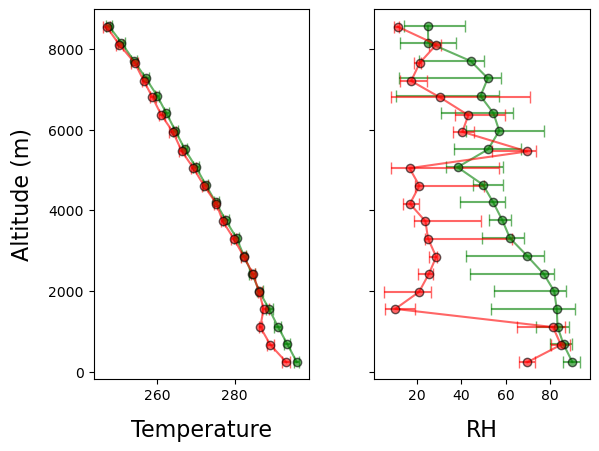

: 

In [179]:
fig, ax = plt.subplots(1, 2, sharey='all')
#plt.rcParams['font.size'] = '10'
ax[0].errorbar(Caribbean_plot['Temp'], Caribbean_plot['GPS Altitude'], xerr=[Caribbean_plot_25['Temp'], Caribbean_plot_75['Temp']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="green", label = '>10nm')
ax[1].errorbar(Caribbean_plot['RH'], Caribbean_plot['GPS Altitude'], xerr=[Caribbean_plot_25['RH'], Caribbean_plot_75['RH']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="green", label = '<100nm')
ax[0].errorbar(North_America_plot['Temp'], North_America_plot['GPS Altitude'], xerr=[North_America_plot_25['Temp'], North_America_plot_75['Temp']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="red", label = '>10nm')
ax[1].errorbar(North_America_plot['RH'], North_America_plot['GPS Altitude'], xerr=[North_America_plot_25['RH'], North_America_plot_75['RH']], marker='o',  markeredgecolor = 'black', linestyle='-', capsize=4, alpha=.6, color="red", label = '<100nm')
ax[0].set_ylabel('Altitude (m)', fontsize = 16, labelpad=11)
ax[0].set_xlabel('Temperature', fontsize = 16, labelpad=11)
ax[1].set_xlabel('RH', fontsize = 16, labelpad=11)

#for ax_ in ax:
    #ax_.tick_params(axis='both', which='both', labelsize=16)
#ax[0].xaxis.set_major_locator(ticker.MaxNLocator(nbins=3))
#ax[0].xaxis.set_minor_locator(ticker.NullLocator())
#ax[1].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[1].xaxis.set_minor_locator(ticker.NullLocator())
# Reduce the number of x-axis tickers to 2 for ax[3]
#ax[2].xaxis.set_major_locator(ticker.MaxNLocator(nbins=2))
#ax[2].xaxis.set_minor_locator(ticker.NullLocator())
#for ax_ in ax:
    #ax_.tick_params(axis='both', which='both', labelsize=16)
#labels = ['a)', 'b)', 'c)', 'd)']
#for i in range(4):
    #trans = ScaledTranslation(10 / 72, -5 / 72, fig.dpi_scale_trans)
    #ax[i].text(
        #-0.01, 1.05, labels[i],
        #transform=ax[i].transAxes + trans,
        #fontsize='large', verticalalignment='top',
        #bbox=dict(facecolor='1', edgecolor='none', pad=3.0))


# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)
#fig.text(0.5, -0.1, '(cm$^{-3}$)', ha='left', va='bottom', fontsize=16)

# Set the title

plt.show()


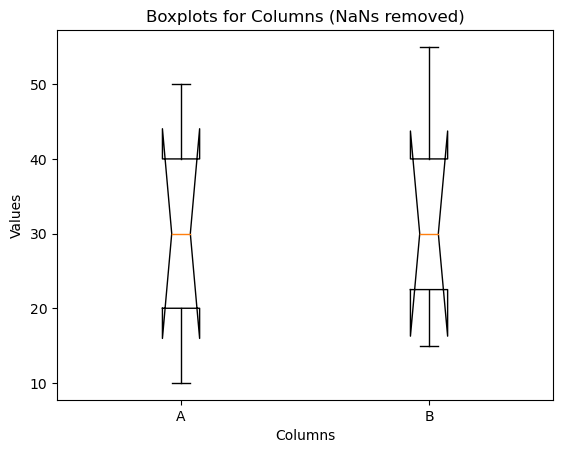

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume df1 and df2 are your two DataFrames with columns 'A' and 'B'
df1 = pd.DataFrame({'A': [10, 20, 30, 40, 50, None]})
df2 = pd.DataFrame({'B': [15, 25, 35, None, 55]})

# Concatenate the DataFrames vertically
merged_df = pd.concat([df1, df2], axis=0, ignore_index=True)

# Create a boxplot for each cleaned column on the same plot
fig, ax = plt.subplots()

# Set the positions for the boxplots
positions = range(1, len(merged_df.columns) + 1)

# Loop through each column, remove NaN values, and plot the boxplot
for i, col in enumerate(merged_df.columns):
    cleaned_values = merged_df[col].dropna()
    ax.boxplot(cleaned_values, positions=[positions[i]], labels=[col], notch=True)

# Set plot title and labels
plt.title('Boxplots for Columns (NaNs removed)')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.show()


Text(0.5, 1.0, '06/07 14:29 -14:45 UTC')

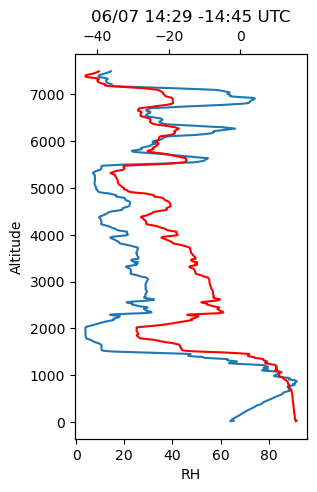

In [ ]:
fig, ax = plt.subplots(figsize=(3, 5))
ax.plot(DAY77['RH'], DAY77['GPS Altitude'])
ax1 = ax.twiny()
ax1.plot(DAY77['Dewpoint'], DAY77['GPS Altitude'], color = 'red')
#ax.set_xscale('log')
#ax.set_xlim(-0,0.006)
ax.set_ylabel('Altitude')
ax.set_xlabel('RH')
ax.set_title('06/07 14:29 -14:45 UTC')

Text(0.5, 1.0, '06/07 14:29 -14:45 UTC')

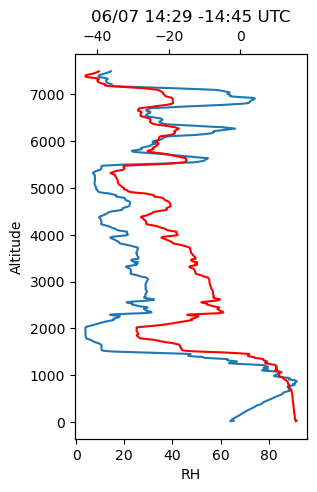

In [ ]:
fig, ax = plt.subplots(figsize=(3, 5))
ax.plot(DAY77['RH'], DAY77['GPS Altitude'])
ax1 = ax.twiny()
ax1.plot(DAY77['Dewpoint'], DAY77['GPS Altitude'], color = 'red')
#ax.set_xscale('log')
#ax.set_xlim(-0,0.006)
ax.set_ylabel('Altitude')
ax.set_xlabel('RH')
ax.set_title('06/07 14:29 -14:45 UTC')